In [1]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as dr
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objs as go
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
from pandas.plotting import lag_plot
from pandas_datareader import DataReader

In [2]:
indus = dr.get_data_yahoo('INDUSINDBK.NS', start = datetime(2002, 8, 5),
                       end = datetime(2022, 1, 1), interval = 'wk')
hdfc = dr.get_data_yahoo('HDFCBANK.NS', start = '2002-08-05',
                       end = '2022-01-01', interval = 'wk')
icici = dr.get_data_yahoo('ICICIBANK.NS', start = datetime(2002, 8, 5),
                       end = datetime(2022, 1, 1), interval = 'wk')
axis = dr.get_data_yahoo( 'AXISBANK.NS', start = datetime(2002, 8, 5),
                       end = datetime(2022, 1, 1), interval = 'wk')

In [3]:
df = pd.concat([indus, hdfc, icici, axis], keys = ['INDUS', 'HDFC', 'ICICI', 'AXIS'], axis = 1)

In [4]:
df

INDUS                                                  \
                  High         Low        Open       Close      Volume   
Date                                                                     
2002-08-04   16.750000   15.850000   16.200001   15.950000    107668.0   
2002-08-11   16.450001   15.600000   15.800000   16.299999     53814.0   
2002-08-18   16.750000   15.550000   16.250000   16.000000    143277.0   
2002-08-25   16.799999   15.850000   16.000000   15.900000     99178.0   
2002-09-01   16.250000   15.900000   16.000000   16.000000     71087.0   
...                ...         ...         ...         ...         ...   
2021-11-28  957.849976  875.700012  926.900024  951.150024  44128431.0   
2021-12-05  968.000000  914.000000  952.000000  944.750000  21543083.0   
2021-12-12  955.599976  880.250000  954.299988  883.000000  14918197.0   
2021-12-19  885.000000  830.799988  874.000000  861.150024  17993376.0   
2021-12-26  893.450012  811.500000  843.000000  888.150024  39013869.0   

                               HDFC                                         \
             Adj Close         High          Low         Open        Close   
Date                                                                         
2002-08-04   11.676104    21.290001    20.809999    21.290001    21.000000   
2002-08-11   11.932321    21.500000    20.735001    20.879999    21.030001   
2002-08-18   11.712705    21.200001    20.700001    21.049999    20.950001   
2002-08-25   11.639502    21.150000    20.799999    21.129999    20.955000   
2002-09-01   11.712705    21.395000    20.900000    21.090000    21.065001   
...                ...          ...          ...          ...          ...   
2021-11-28  943.545105  1535.949951  1462.000000  1494.800049  1513.550049   
2021-12-05  937.196289  1555.050049  1497.349976  1513.000000  1522.550049   
2021-12-12  875.940002  1537.650024  1467.699951  1526.000000  1473.050049   
2021-12-19  854.264709  1458.000000  1414.099976  1452.000000  1438.900024   
2021-12-26  881.048828  1484.800049  1422.150024  1428.900024  1479.400024   

            ...       ICICI                                             AXIS  \
            ...        Open       Close       Volume   Adj Close        High   
Date        ...                                                                
2002-08-04  ...   25.454544   24.663635    6342390.0   17.847843    8.400000   
2002-08-11  ...   24.545454   24.400000    2168263.0   17.657064    7.300000   
2002-08-18  ...   24.372726   25.336363    4238184.0   18.334661    7.300000   
2002-08-25  ...   25.618181   26.109091    8110893.0   18.893843    7.850000   
2002-09-01  ...   26.181818   25.981817    3159875.0   18.801741    7.400000   
...         ...         ...         ...          ...         ...         ...   
2021-11-28  ...  726.750000  716.299988   97113800.0  712.027161  687.349976   
2021-12-05  ...  719.000000  758.000000  107710027.0  753.478394  701.549988   
2021-12-12  ...  763.000000  728.299988   69053377.0  723.955566  721.950012   
2021-12-19  ...  718.099976  727.099976   60101449.0  722.762695  684.500000   
2021-12-26  ...  724.000000  740.150024   54231128.0  735.734924  686.500000   

                                                                        
                   Low        Open       Close      Volume   Adj Close  
Date                                                                    
2002-08-04    6.900000    8.400000    7.040000   1207175.0    5.712821  
2002-08-11    6.950000    7.290000    7.000000    561190.0    5.680360  
2002-08-18    6.930000    7.300000    7.100000    516425.0    5.761509  
2002-08-25    7.000000    7.180000    7.010000   1895050.0    5.688476  
2002-09-01    7.010000    7.300000    7.150000    960900.0    5.802083  
...                ...         ...         ...         ...         ...  
2021-11-28  648.000000  665.049988  673.000000  71086971.0  671.977112  
2021-12-05  661.150024  674.000000  

In [5]:
df.describe()

INDUS                                                       \
              High          Low         Open        Close        Volume   
count  1013.000000  1013.000000  1013.000000  1013.000000  1.013000e+03   
mean    566.020632   528.303752   547.551382   547.965993  1.233208e+07   
std     580.273157   550.900126   566.573373   566.135614  2.557889e+07   
min      14.000000    12.750000    13.500000    13.600000  4.436000e+04   
25%      59.000000    52.349998    55.950001    56.049999  2.962193e+06   
50%     324.799988   297.100006   313.500000   316.350006  5.194173e+06   
75%     968.000000   910.599976   946.500000   945.250000  9.543565e+06   
max    2038.000000  1963.250000  2022.900024  2015.849976  2.621429e+08   

                           HDFC                                         ...  \
         Adj Close         High          Low         Open        Close  ...   
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  ...   
mean    531.352856   462.635839   440.654827   451.463168   452.736179  ...   
std     555.849954   450.853305   432.500731   441.788683   441.963377  ...   
min      10.813533    19.610001    18.600000    19.025000    18.985001  ...   
25%      50.075436   106.980003    96.000000   101.110001   101.750000  ...   
50%     300.685913   268.875000   252.649994   261.875000   262.325012  ...   
75%     915.443481   704.000000   679.575012   680.599976   688.525024  ...   
max    1979.456665  1725.000000  1660.849976  1705.000000  1687.400024  ...   

             ICICI                                                 AXIS  \
              Open        Close        Volume    Adj Close         High   
count  1013.000000  1013.000000  1.013000e+03  1013.000000  1013.000000   
mean    220.391855   220.675423  9.372622e+07   204.639869   319.180435   
std     151.836306   152.163481  7.909143e+07   155.904422   239.752613   
min      21.818180    21.827272  2.168263e+06    15.795303     7.190000   
25%     116.363632   116.800003  4.360233e+07    96.075340   100.959999   
50%     189.090912   190.063629  7.752266e+07   166.845535   255.399994   
75%     285.909088   285.954559  1.144352e+08   270.297424   523.950012   
max     807.700012   802.049988  7.606009e+08   797.265625   866.900024   

                                                                         
               Low         Open        Close        Volume    Adj Close  
count  1013.000000  1013.000000  1013.000000  1.013000e+03  1013.000000  
mean    297.068114   308.233505   308.438786  4.171107e+07   299.662743  
std     227.354837   233.718811   233.532903  3.800032e+07   235.411669  
min       6.810000     7.040000     7.000000  4.072550e+05     5.680360  
25%      91.040001    95.639999    96.559998  1.570960e+07    85.905945  
50%     239.199997   246.039993   246.500000  3.425315e+07   229.706451  
75%     495.000000   509.000000   509.200012  5.281467e+07   504.089294  
max     801.299988   830.099976   816.700012  2.885713e+08   815.458740  

[8 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2002-08-04 to 2021-12-26
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (INDUS, High)       1013 non-null   float64
 1   (INDUS, Low)        1013 non-null   float64
 2   (INDUS, Open)       1013 non-null   float64
 3   (INDUS, Close)      1013 non-null   float64
 4   (INDUS, Volume)     1013 non-null   float64
 5   (INDUS, Adj Close)  1013 non-null   float64
 6   (HDFC, High)        1013 non-null   float64
 7   (HDFC, Low)         1013 non-null   float64
 8   (HDFC, Open)        1013 non-null   float64
 9   (HDFC, Close)       1013 non-null   float64
 10  (HDFC, Volume)      1013 non-null   float64
 11  (HDFC, Adj Close)   1013 non-null   float64
 12  (ICICI, High)       1013 non-null   float64
 13  (ICICI, Low)        1013 non-null   float64
 14  (ICICI, Open)       1013 non-null   float64
 15  (ICICI, Close)      1013 non-null   f

In [7]:
df.isna().sum()

INDUS  High         0
       Low          0
       Open         0
       Close        0
       Volume       0
       Adj Close    0
HDFC   High         0
       Low          0
       Open         0
       Close        0
       Volume       0
       Adj Close    0
ICICI  High         0
       Low          0
       Open         0
       Close        0
       Volume       0
       Adj Close    0
AXIS   High         0
       Low          0
       Open         0
       Close        0
       Volume       0
       Adj Close    0
dtype: int64

Text(0.5, 1.0, 'INDUS Cumulative Returns')

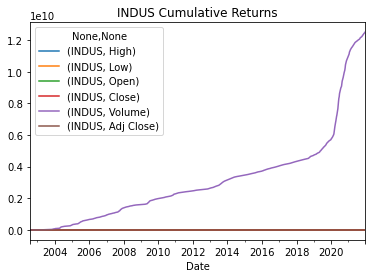

In [8]:
cr = df[['INDUS']].cumsum()
cr.plot()
plt.title('INDUS Cumulative Returns')

Text(0.5, 1.0, 'INDUS Autocorelation plot')

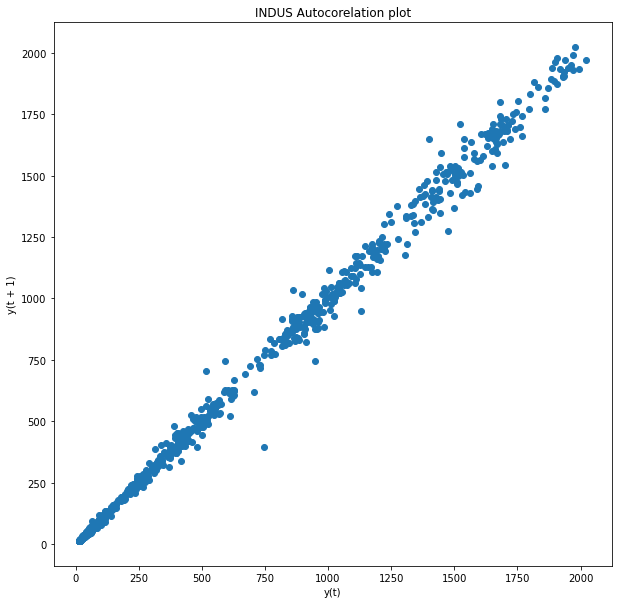

In [9]:
plt.figure(figsize=(10, 10))
lag_plot(df.INDUS.Open , lag = 1)
plt.title('INDUS Autocorelation plot')

In [10]:
indusn = df.INDUS
hdfcn = df.HDFC
icicin = df.ICICI
axisn = df.AXIS

In [11]:
indusn.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
hdfcn.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [13]:
icicin.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [14]:
axisn.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
fig = px.histogram(indusn, x='Close', marginal='box', nbins=47, color_discrete_sequence=['aquamarine'], title='Distribution of Close(INDUS)')
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
fig = px.histogram(hdfcn, x='Close', marginal='box', nbins=47, color_discrete_sequence=['aquamarine'], title='Distribution of Close(HDFC)')
fig.update_layout(bargap = 0.1)
fig.show()

In [17]:
fig = px.histogram(icicin, x='Close', marginal='box', nbins=47, color_discrete_sequence=['aquamarine'], title='Distribution of Close(ICICI)')
fig.update_layout(bargap = 0.1)
fig.show()

In [18]:
fig = px.histogram(axisn, x='Close', marginal='box', nbins=47, color_discrete_sequence=['aquamarine'], title='Distribution of Close(AXIS)')
fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
fig = px.histogram(indusn, x='Open', marginal='box', color_discrete_sequence=['pink'], title='Distribution of Open(INDUS)')
fig.update_layout(bargap = 0.1)
fig.show()

In [20]:
fig = px.histogram(hdfcn, x='Open', marginal='box', color_discrete_sequence=['pink'], title='Distribution of Open(HDFC)')
fig.update_layout(bargap = 0.1)
fig.show()

In [21]:
fig = px.histogram(icicin, x='Open', marginal='box', color_discrete_sequence=['pink'], title='Distribution of Open(ICICI)')
fig.update_layout(bargap = 0.1)
fig.show()

In [22]:
fig = px.histogram(axisn, x='Open', marginal='box', color_discrete_sequence=['pink'], title='Distribution of Open(AXIS)')
fig.update_layout(bargap = 0.1)
fig.show()

In [23]:
fig = px.scatter(indusn, x = 'Open', y = 'Close', opacity = 0.8, title = 'Open VS Close(INDUS)')
fig.update_traces(marker_size = 5)
fig.show()

In [24]:
fig = px.scatter(hdfcn, x = 'Open', y = 'Close', opacity = 0.8, title = 'Open VS Close(HDFC)')
fig.update_traces(marker_size = 5)
fig.show()

In [25]:
fig = px.scatter(icicin, x = 'Open', y = 'Close', opacity = 0.8, title = 'Open VS Close(ICICI)')
fig.update_traces(marker_size = 5)
fig.show()

In [26]:
fig = px.scatter(axisn, x = 'Open', y = 'Close', opacity = 0.8, title = 'Open VS Close(AXIS)')
fig.update_traces(marker_size = 5)
fig.show()

In [27]:
indusn.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.998358  0.999154  0.999127  0.126438   0.999215
Low        0.998358  1.000000  0.998635  0.999114  0.094798   0.998948
Open       0.999154  0.998635  1.000000  0.998144  0.109933   0.998155
Close      0.999127  0.999114  0.998144  1.000000  0.110530   0.999931
Volume     0.126438  0.094798  0.109933  0.110530  1.000000   0.115480
Adj Close  0.999215  0.998948  0.998155  0.999931  0.115480   1.000000

In [28]:
hdfcn.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999169  0.999401  0.999663  0.116579   0.999641
Low        0.999169  1.000000  0.999413  0.999376  0.095280   0.999250
Open       0.999401  0.999413  1.000000  0.998988  0.107157   0.998935
Close      0.999663  0.999376  0.998988  1.000000  0.107611   0.999915
Volume     0.116579  0.095280  0.107157  0.107611  1.000000   0.109543
Adj Close  0.999641  0.999250  0.998935  0.999915  0.109543   1.000000

In [29]:
icicin.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.998127  0.998601  0.998783  0.062706   0.997328
Low        0.998127  1.000000  0.998410  0.998629  0.034518   0.997405
Open       0.998601  0.998410  1.000000  0.997058  0.048830   0.995755
Close      0.998783  0.998629  0.997058  1.000000  0.049786   0.998569
Volume     0.062706  0.034518  0.048830  0.049786  1.000000   0.052315
Adj Close  0.997328  0.997405  0.995755  0.998569  0.052315   1.000000

In [30]:
axisn.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.998250  0.998901  0.998834  0.306993   0.998517
Low        0.998250  1.000000  0.998320  0.998809  0.277044   0.998543
Open       0.998901  0.998320  1.000000  0.997353  0.292184   0.997101
Close      0.998834  0.998809  0.997353  1.000000  0.293399   0.999650
Volume     0.306993  0.277044  0.292184  0.293399  1.000000   0.293749
Adj Close  0.998517  0.998543  0.997101  0.999650  0.293749   1.000000

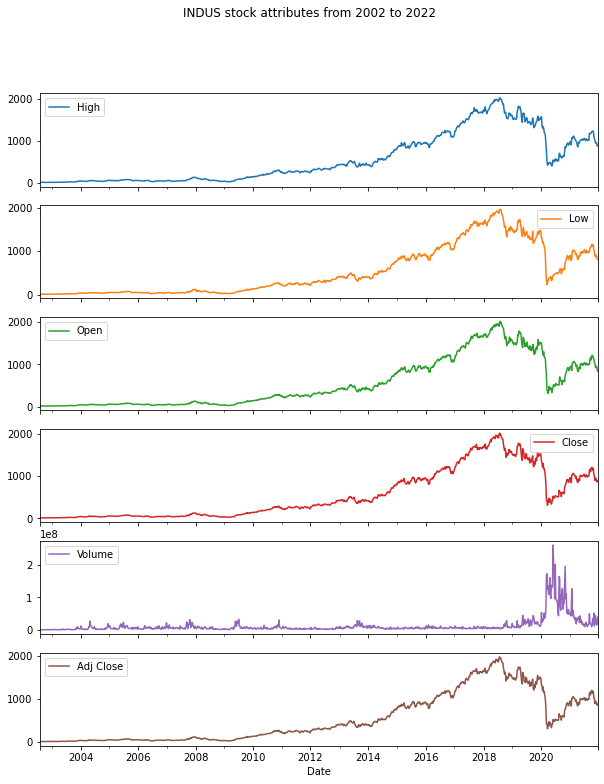

In [31]:
indusn['2002':'2022'].plot(subplots = True, figsize = (10, 12), title = 'INDUS stock attributes from 2002 to 2022')
plt.show()

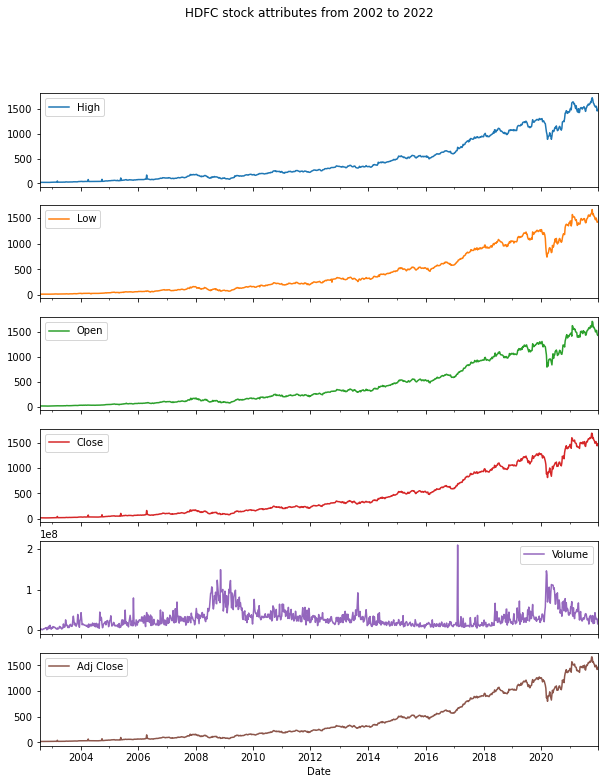

In [32]:
hdfcn['2002':'2022'].plot(subplots = True, figsize = (10, 12), title = 'HDFC stock attributes from 2002 to 2022')
plt.show()

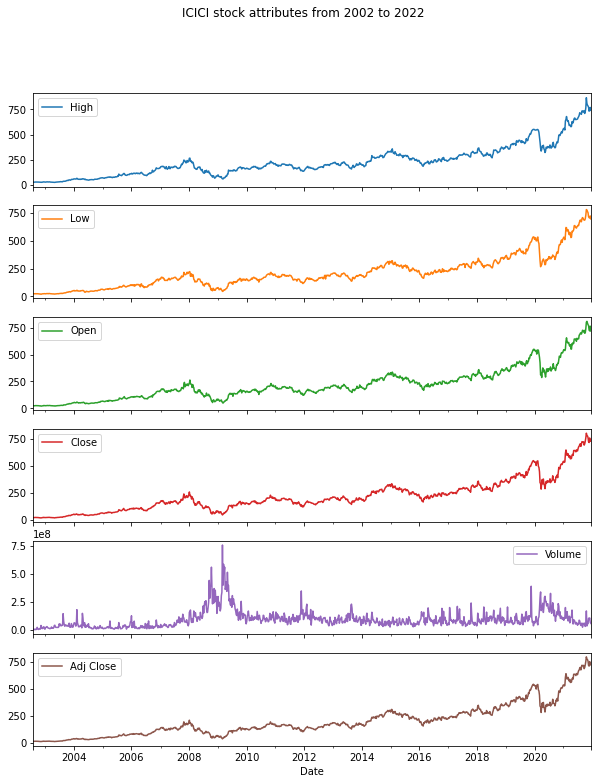

In [33]:
icicin['2002':'2022'].plot(subplots = True, figsize = (10, 12), title = 'ICICI stock attributes from 2002 to 2022')
plt.show()

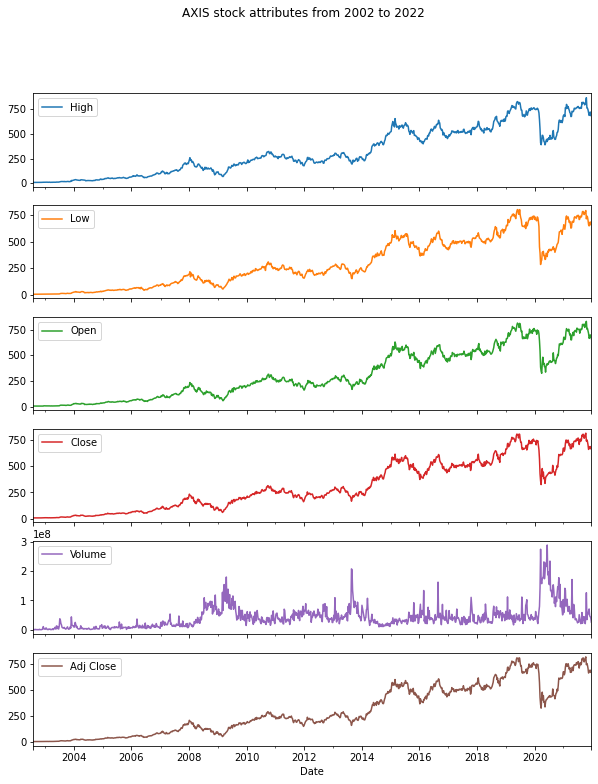

In [34]:
axisn['2002':'2022'].plot(subplots = True, figsize = (10, 12), title = 'AXIS stock attributes from 2002 to 2022')
plt.show()

In [35]:
MA_d = [10, 50, 100, 150]
for m in MA_d:
    col_name = 'MA for %s days'%(str(m))
    indusn[col_name] = indusn['Close'].rolling(m).mean()
    hdfcn[col_name] = hdfcn['Close'].rolling(m).mean()
    icicin[col_name] = icicin['Close'].rolling(m).mean()
    axisn[col_name] = axisn['Close'].rolling(m).mean()

<AxesSubplot:title={'center':'Moving Average (INDUS)'}, xlabel='Date'>

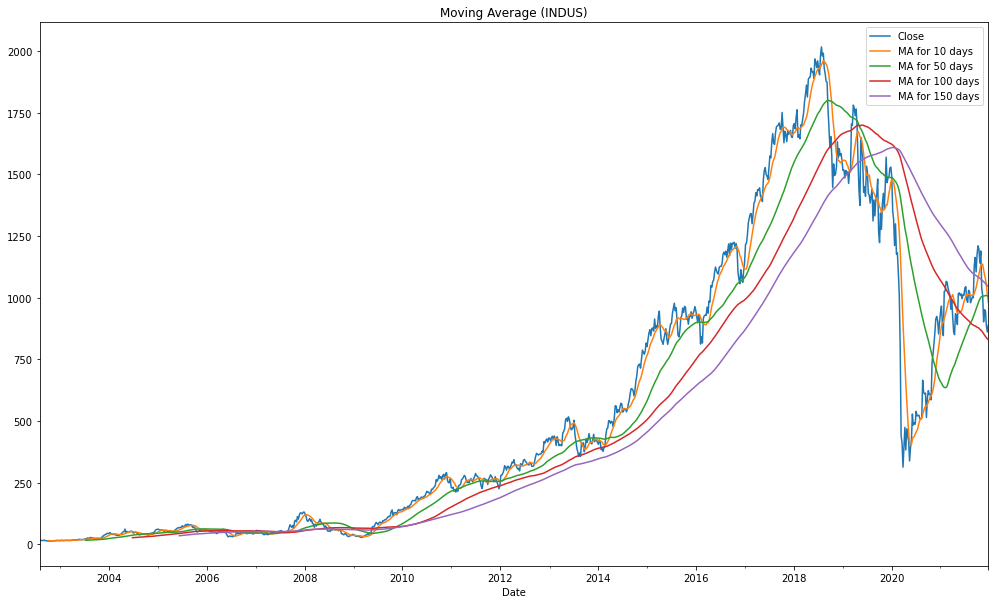

In [36]:
indusn[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'MA for 150 days']].plot(subplots = False, title = ('Moving Average (INDUS)'), figsize = (17, 10))

<AxesSubplot:title={'center':'Moving Average (HDFC)'}, xlabel='Date'>

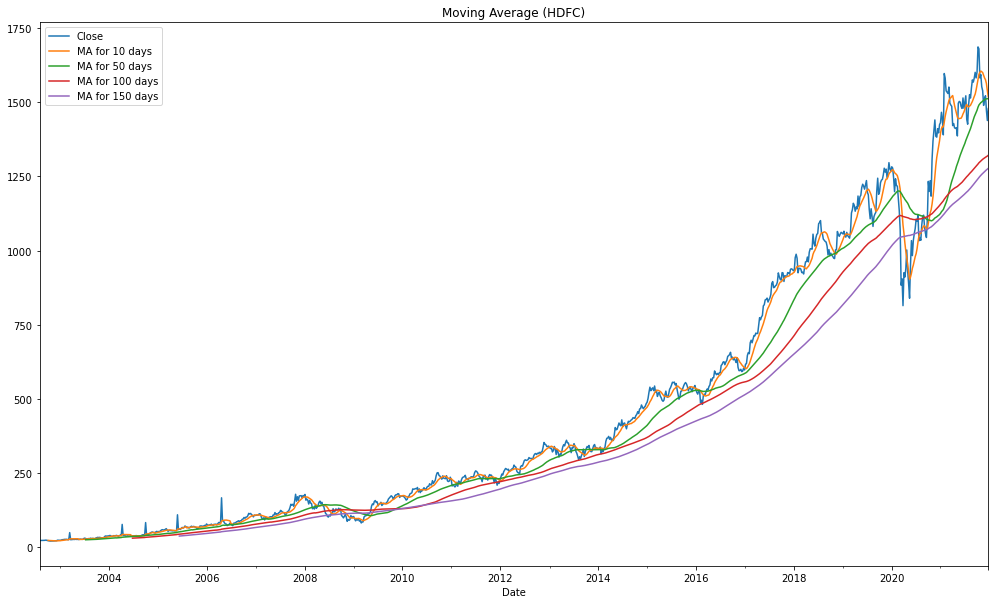

In [37]:
hdfcn[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'MA for 150 days']].plot(subplots = False, title = ('Moving Average (HDFC)'), figsize = (17, 10))

<AxesSubplot:title={'center':'Moving Average (ICICI)'}, xlabel='Date'>

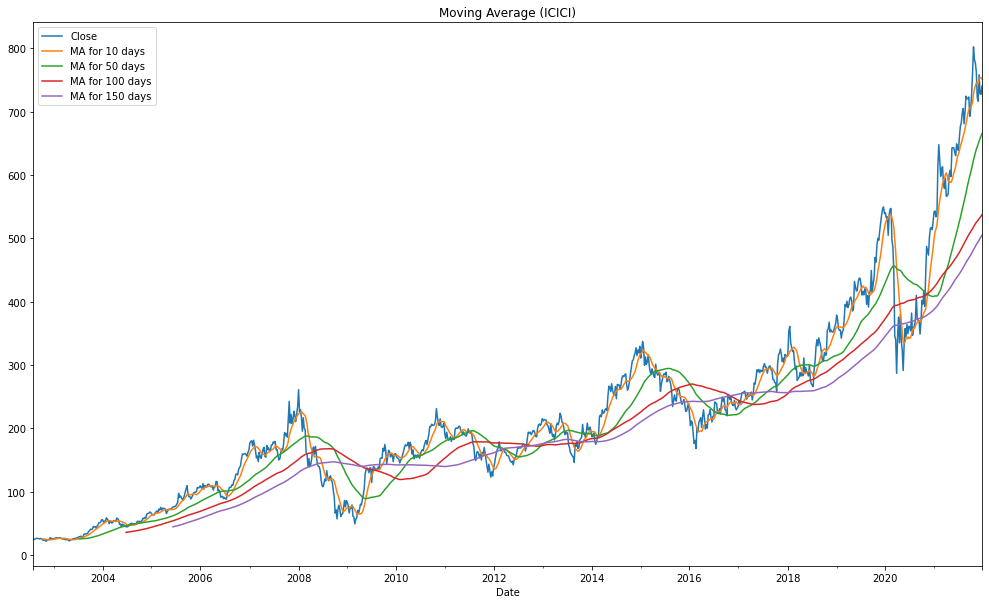

In [38]:
icicin[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'MA for 150 days']].plot(subplots = False, title = ('Moving Average (ICICI)'), figsize = (17, 10))

<AxesSubplot:title={'center':'Moving Average (AXIS)'}, xlabel='Date'>

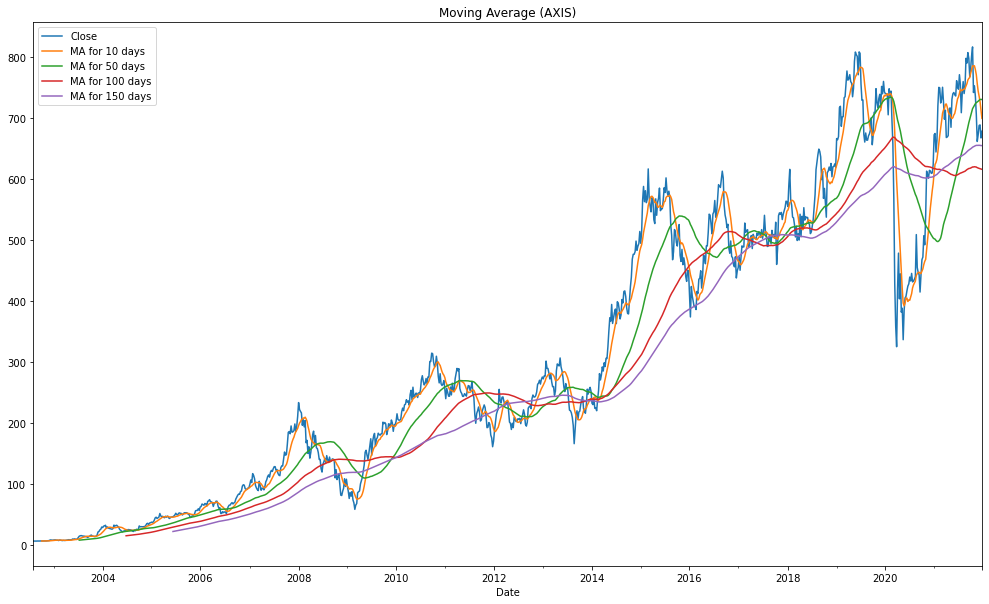

In [39]:
axisn[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'MA for 150 days']].plot(subplots = False, title = ('Moving Average (AXIS)'), figsize = (17, 10))

<AxesSubplot:xlabel='Date'>

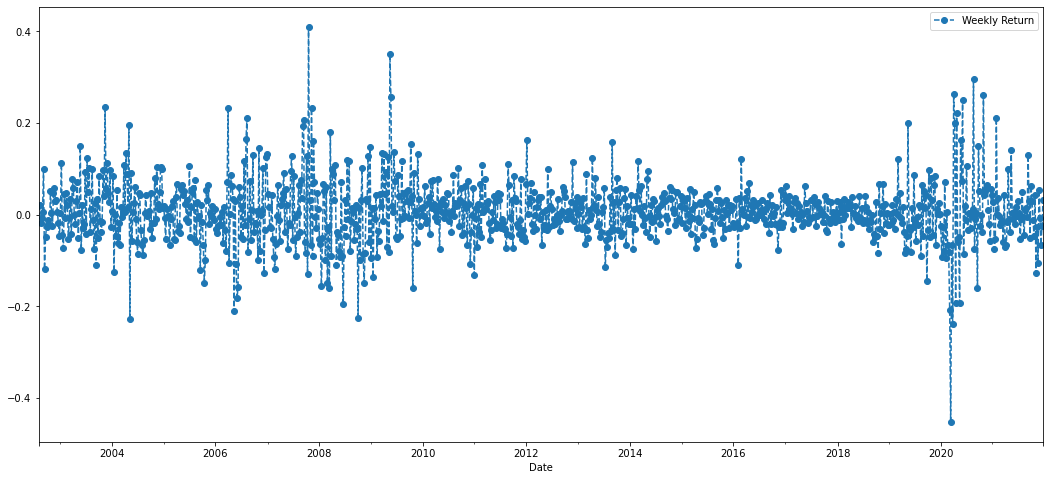

In [40]:
indusn['Weekly Return'] = indusn['Close'].pct_change()
indusn['Weekly Return'].plot(figsize = (18, 8), legend = True, linestyle = '--', marker = 'o')

<AxesSubplot:xlabel='Date'>

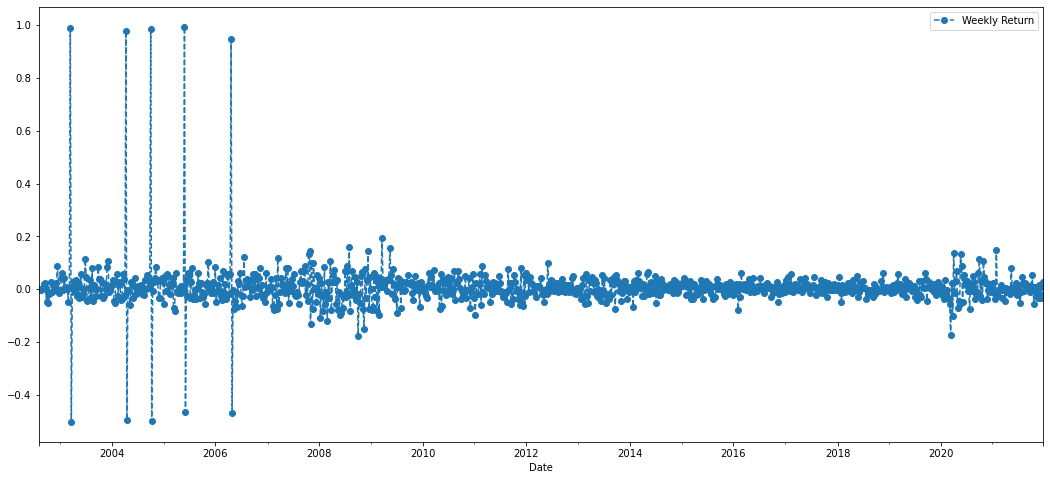

In [41]:
hdfcn['Weekly Return'] = hdfcn['Close'].pct_change()
hdfcn['Weekly Return'].plot(figsize = (18, 8), legend = True, linestyle = '--', marker = 'o')

<AxesSubplot:xlabel='Date'>

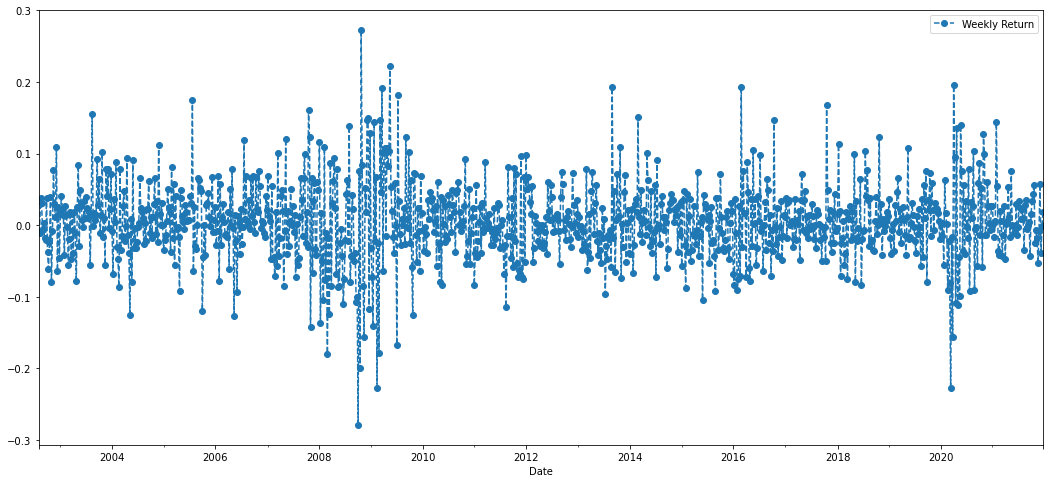

In [42]:
icicin['Weekly Return'] = icicin['Close'].pct_change()
icicin['Weekly Return'].plot(figsize = (18, 8), legend = True, linestyle = '--', marker = 'o')

<AxesSubplot:xlabel='Date'>

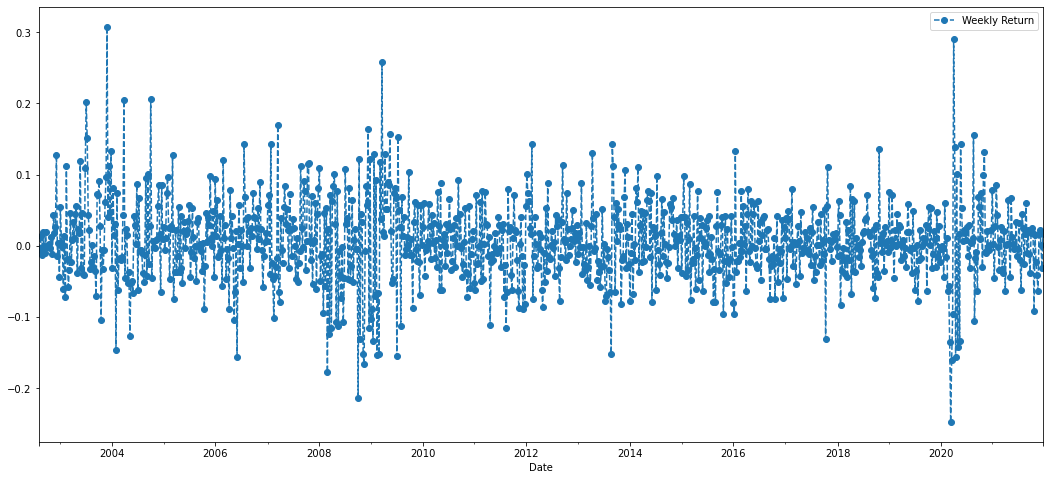

In [43]:
axisn['Weekly Return'] = axisn['Close'].pct_change()
axisn['Weekly Return'].plot(figsize = (18, 8), legend = True, linestyle = '--', marker = 'o')

In [44]:
adj_indus = indusn['Adj Close']
adj_hdfc = hdfcn['Adj Close']
adj_icici = icicin['Adj Close']
adj_axis = axisn['Adj Close']

In [45]:
closing_df = pd.concat([adj_indus, adj_hdfc, adj_icici, adj_axis], axis=1)
closing_df.columns.values[0] = 'INDUSLAND_BK'
closing_df.columns.values[1] = 'HDFC_BK'
closing_df.columns.values[2] = 'ICICI_BK'
closing_df.columns.values[3] = 'AXIS_BK'

In [46]:
closing_df

INDUSLAND_BK      HDFC_BK    ICICI_BK     AXIS_BK
Date                                                         
2002-08-04     11.676104    18.149456   17.847843    5.712821
2002-08-11     11.932321    18.175390   17.657064    5.680360
2002-08-18     11.712705    18.106249   18.334661    5.761509
2002-08-25     11.639502    18.110565   18.893843    5.688476
2002-09-01     11.712705    18.205637   18.801741    5.802083
...                  ...          ...         ...         ...
2021-11-28    943.545105  1496.154175  712.027161  671.977112
2021-12-05    937.196289  1505.050781  753.478394  687.004272
2021-12-12    875.940002  1456.119751  723.955566  687.852966
2021-12-19    854.264709  1422.362183  722.762695  666.485474
2021-12-26    881.048828  1462.396729  735.734924  677.518677

[1013 rows x 4 columns]

In [47]:
bk_adj = closing_df.pct_change()

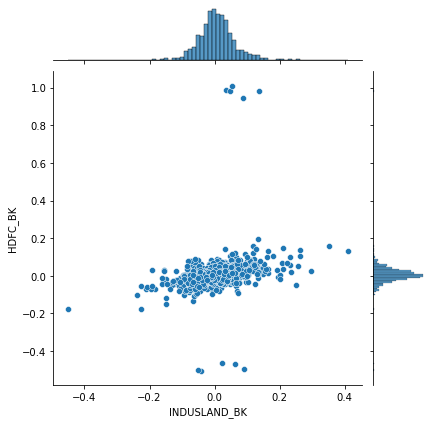

In [48]:
sns.jointplot('INDUSLAND_BK', 'HDFC_BK', bk_adj, kind='scatter')

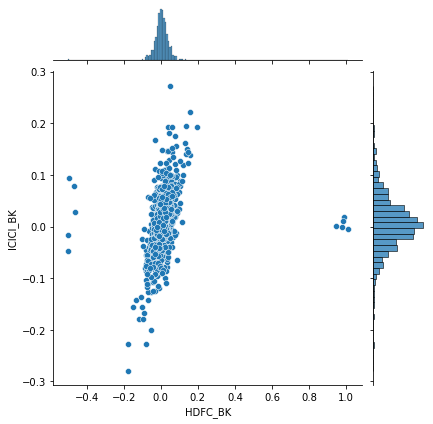

In [49]:
sns.jointplot('HDFC_BK', 'ICICI_BK', bk_adj, kind='scatter')

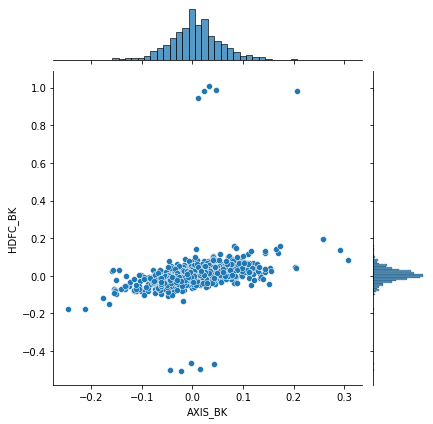

In [50]:
sns.jointplot('AXIS_BK', 'HDFC_BK', bk_adj, kind='scatter')

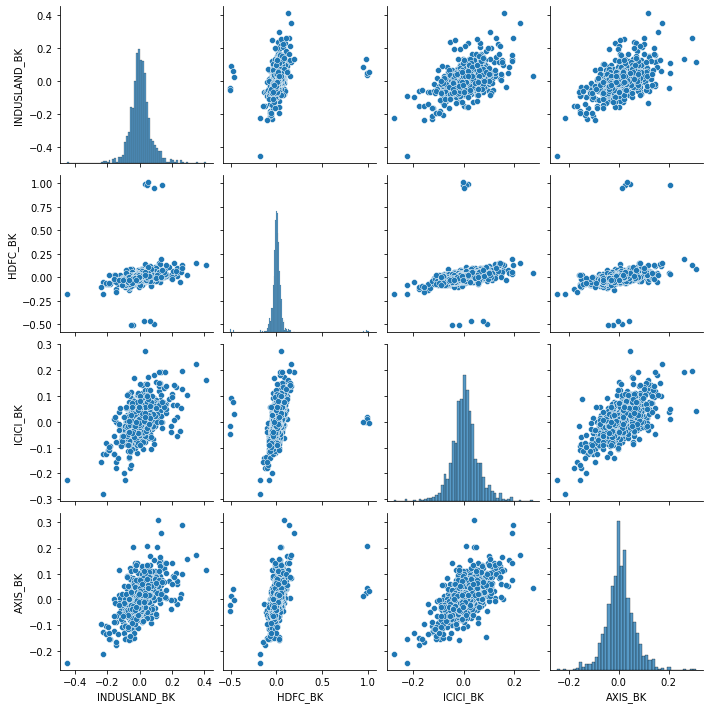

In [51]:
sns.pairplot(bk_adj.dropna())

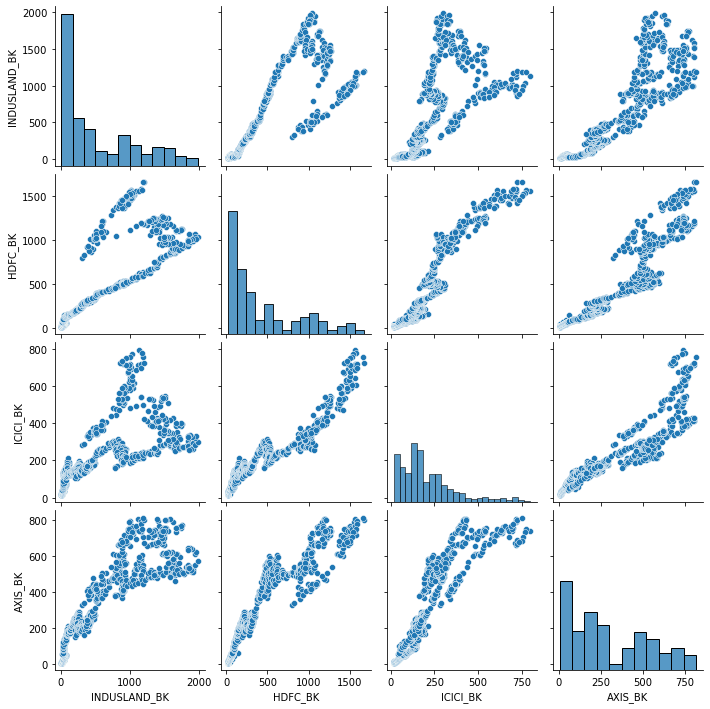

In [52]:
sns.pairplot(closing_df.dropna())

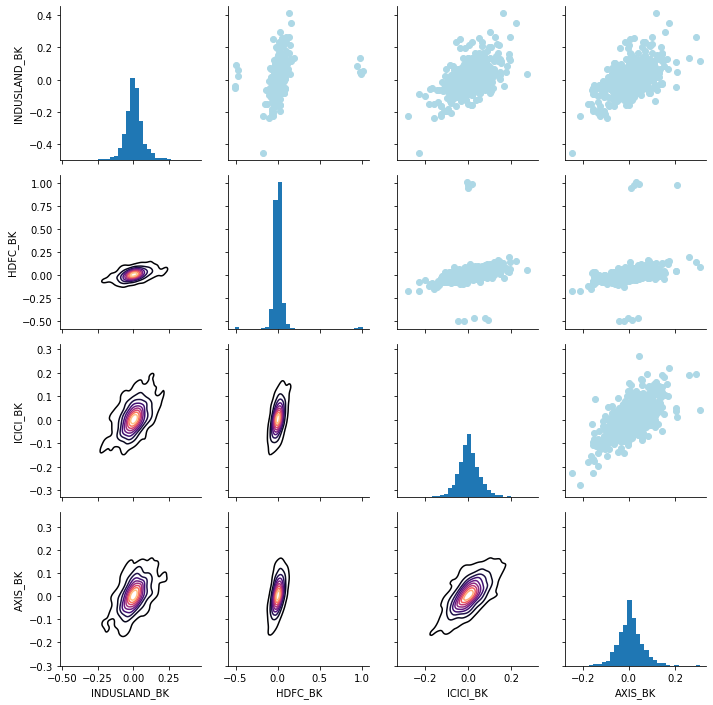

In [53]:
returns_fig = sns.PairGrid(bk_adj.dropna())
returns_fig.map_upper(plt.scatter, color = 'lightblue')
returns_fig.map_lower(sns.kdeplot,cmap='magma')
returns_fig.map_diag(plt.hist,bins=30)

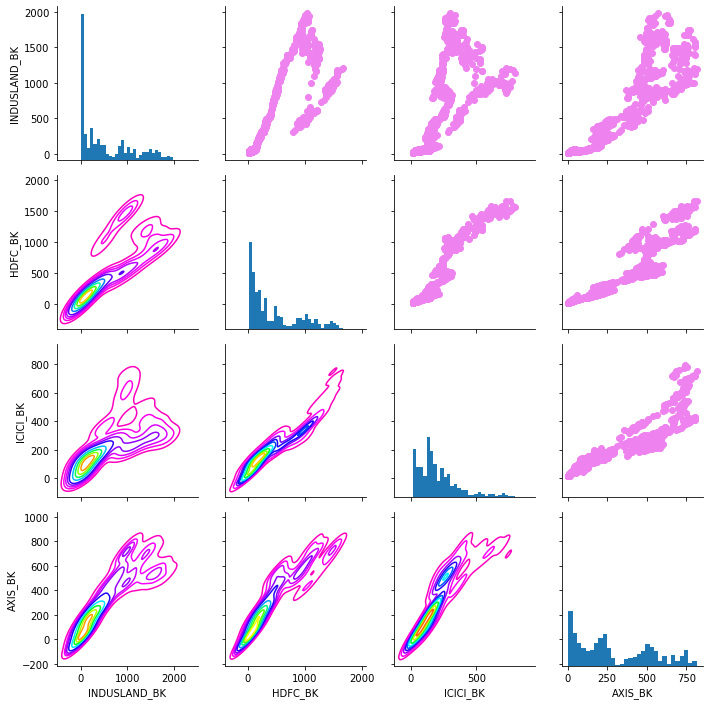

In [54]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'violet')
returns_fig.map_lower(sns.kdeplot, cmap='gist_rainbow_r')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

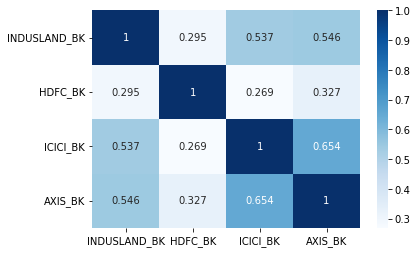

In [55]:
sns.heatmap(bk_adj.corr(), annot = True, fmt = '.3g', cmap = 'Blues')

<AxesSubplot:>

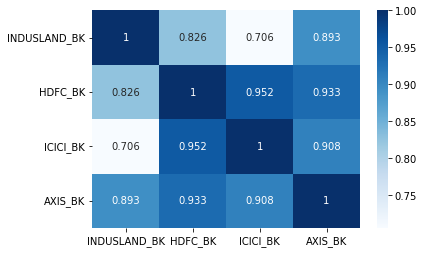

In [56]:
sns.heatmap(closing_df.corr(), annot = True, fmt = '.3g', cmap= 'Blues')

In [57]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(hdfcn.Open, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9110.986, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9114.461, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9109.051, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9108.999, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9116.570, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9110.994, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9112.997, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9111.942, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.419 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1013
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4551.499
Date:                Fri, 04 Nov 2022   AIC                           9108.999
Time:                        06:54:1

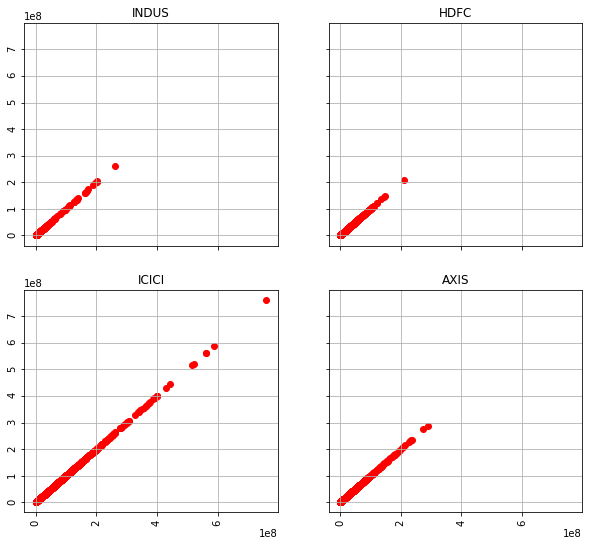

In [58]:
indusn['Diff'] = indusn['Open'] - indusn['Close']
indusn_dif = indusn.resample('W').mean()

hdfcn['Diff'] = hdfcn['Open'] - hdfcn['Close']
hdfcn_dif = hdfcn.resample('W').mean()

icicin['Diff'] = icicin['Open'] - icicin['Close']
icicin_dif = icicin.resample('W').mean()

axisn['Diff'] = axisn['Open'] - axisn['Close']
axisn_dif = axisn.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize = (10, 9), sharex=True, sharey=True )

ax[0,0].scatter(indusn_dif, indusn_dif, color = 'r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('INDUS');

ax[0,1].scatter(hdfcn_dif, hdfcn_dif, color = 'r')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('HDFC');

ax[1,0].scatter(icicin_dif, icicin_dif, color = 'r')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('ICICI');

ax[1,1].scatter(axisn_dif, axisn_dif, color = 'r')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('AXIS');


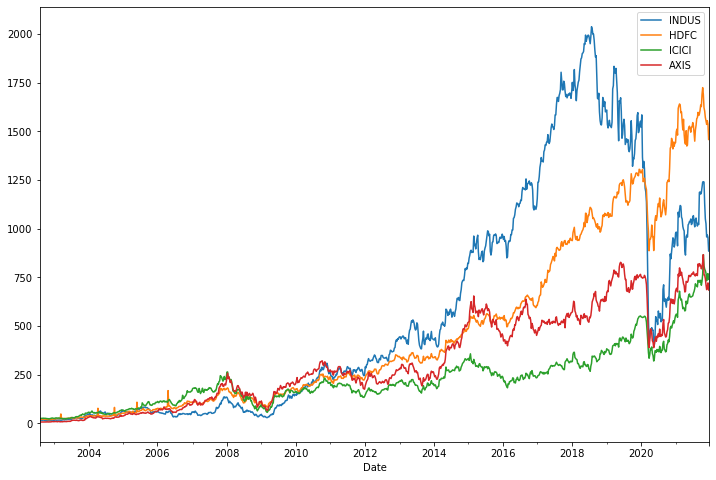

In [59]:
plt.figure(figsize = [12,8])
indusn.High.plot()
hdfcn.High.plot()
icicin.High.plot()
axisn.High.plot()
plt.legend(['INDUS', 'HDFC', 'ICICI', 'AXIS'])
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import r2_score, precision_score

In [61]:
indus['Tomorrow'] = indus['Close'].shift(-1)
indus['Target'] = (indus['Tomorrow'] > indus['Close']).astype(int)
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [62]:
train = indus.iloc[:-100]
test = indus.iloc[-100:]

In [63]:
predictors = ['Close']
rf_model.fit(train[predictors], train['Target'])
preds = rf_model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [64]:
precision_score(test['Target'], preds)

0.44871794871794873

<AxesSubplot:xlabel='Date'>

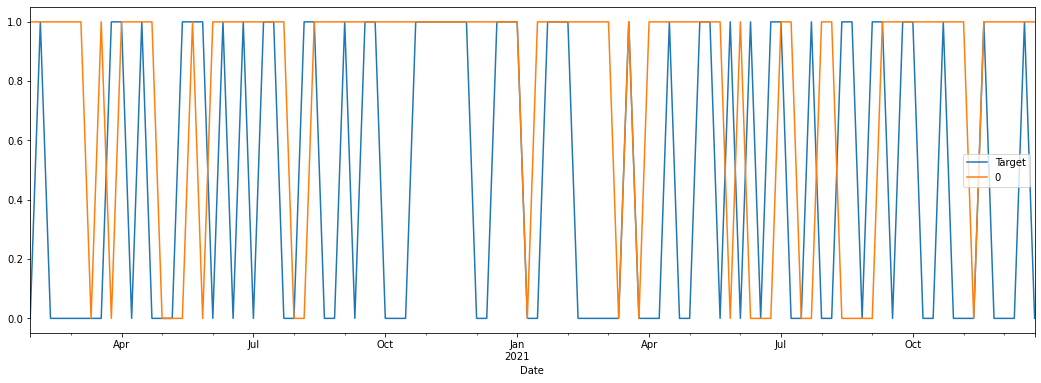

In [65]:
pcom = pd.concat([test['Target'], preds], axis=1)
pcom.plot(figsize = [18, 6])

In [66]:
def predict(train, test, predictors, model):
    rf_model.fit(train[predictors], train['Target'])
    preds = rf_model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_pred = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_pred.append(predictions)
    return all_pred
predictions = backtest(indus, model, predictors)

In [67]:
array = hdfc[['Close']].values

In [68]:
x = array[:-100]
y = array[-100:]

## Model Building for HDFC Stock

In [70]:
data = hdfc.filter(['Close'])
data

Close
Date                   
2002-08-04    21.000000
2002-08-11    21.030001
2002-08-18    20.950001
2002-08-25    20.955000
2002-09-01    21.065001
...                 ...
2021-11-28  1513.550049
2021-12-05  1522.550049
2021-12-12  1473.050049
2021-12-19  1438.900024
2021-12-26  1479.400024

[1013 rows x 1 columns]

In [71]:
ds = data.values

In [72]:
train_len = math.ceil(len(ds)*.7)
train_len

710

In [73]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ds)
scaled_data, scaled_data.shape

(array([[0.00120773],
        [0.00122571],
        [0.00117776],
        ...,
        [0.87152479],
        [0.85105624],
        [0.87533078]]),
 (1013, 1))

In [74]:
train_data = scaled_data[0:train_len, :]

x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
print(len(x_train))
print(len(y_train))

[array([0.00120773, 0.00122571, 0.00117776, 0.00118076, 0.00124669,
       0.00149243, 0.0018131 , 0.00185505, 0.00121373, 0.00100994,
       0.00037461, 0.00015284, 0.        , 0.00031467, 0.00017382,
       0.00033864, 0.00031167, 0.00050647, 0.00077918, 0.00183408,
       0.00172019, 0.00153439, 0.00150142, 0.00202887, 0.002856  ,
       0.00283203, 0.00341342, 0.00350033, 0.00361721, 0.00359623,
       0.00288597, 0.00296089, 0.017157  , 0.00278108, 0.00296689,
       0.00298487, 0.0034314 , 0.00327556, 0.00376105, 0.00335049,
       0.00367415, 0.00318566, 0.00331153, 0.00416863, 0.00371011,
       0.00349733, 0.00350332, 0.00520854, 0.00599072, 0.00519955,
       0.00449528, 0.00458819, 0.00511863, 0.00464213, 0.00594277,
       0.0051456 , 0.00538535, 0.00536437, 0.00490885, 0.00489087])]
[0.0062694227366914875]

[array([0.00120773, 0.00122571, 0.00117776, 0.00118076, 0.00124669,
       0.00149243, 0.0018131 , 0.00185505, 0.00121373, 0.00100994,
       0.00037461, 0.00015284, 0.

In [75]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(650, 60, 1)

#### Moving Average Model

In [155]:
data = hdfc.sort_index(ascending=True, axis=0)

In [156]:
new_data = pd.DataFrame(index=range(0, len(hdfc)), columns=['Date', 'Close'])

In [157]:
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
train = new_data[:709]
valid = new_data[709:]

In [158]:
train.shape, valid.shape

((709, 2), (304, 2))

In [176]:
preds = []
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train)-190+i:].sum() + sum(preds)
    b = a/190
    preds.append(b)

rmse = np.sqrt(np.mean(np.array(np.power((valid['Close'])-preds,2))))
rmse

581.3808830580405

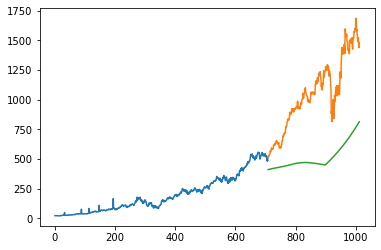

In [160]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

#### KNN Model

In [161]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [162]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [163]:
new_data = pd.DataFrame(hdfc, columns=['Open', 'High', 'Low', 'Close'])
train = new_data[:709]
valid = new_data[709:]

In [164]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [165]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [166]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv = 5)

In [167]:
model_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [168]:
pred = model_knn.predict(x_valid)

In [171]:
rmse_knn = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(pred)),2)))
rmse_knn

803.0618347495885

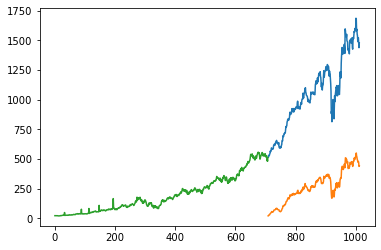

In [172]:
valid['Predictions'] = 0
valid['Predictions'] = pred
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

#### LSTM Model

In [77]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
65/65 [==============================] - 8s 39ms/step - loss: 0.0011
Epoch 2/100
65/65 [==============================] - 3s 41ms/step - loss: 1.1110e-04
Epoch 3/100
65/65 [==============================] - 3s 39ms/step - loss: 1.1159e-04
Epoch 4/100
65/65 [==============================] - 3s 40ms/step - loss: 1.0669e-04
Epoch 5/100
65/65 [==============================] - 3s 40ms/step - loss: 1.1212e-04
Epoch 6/100
65/65 [==============================] - 3s 40ms/step - loss: 1.1547e-04
Epoch 7/100
65/65 [==============================] - 2s 38ms/step - loss: 1.1206e-04
Epoch 8/100
65/65 [==============================] - 2s 38ms/step - loss: 9.9780e-05
Epoch 9/100
65/65 [==============================] - 3s 39ms/step - loss: 1.0322e-04
Epoch 10/100
65/65 [==============================] - 3s 47ms/step - loss: 9.0746e-05
Epoch 11/100
65/65 [==============================] - 2s 38ms/step - loss: 9.9331e-05
Epoch 12/100
65/65 [==============================] - 3s 41ms/step 

65/65 [==============================] - 2s 37ms/step - loss: 4.1213e-05
Epoch 97/100
65/65 [==============================] - 2s 38ms/step - loss: 4.5687e-05
Epoch 98/100
65/65 [==============================] - 2s 38ms/step - loss: 4.0559e-05
Epoch 99/100
65/65 [==============================] - 2s 37ms/step - loss: 5.1073e-05
Epoch 100/100
65/65 [==============================] - 2s 37ms/step - loss: 5.5338e-05


In [80]:
test_data = scaled_data[train_len-60:, :]
x_test = []
y_test = ds[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [81]:
x_test = np.array(x_test)

In [82]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [83]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [84]:
print(predictions[0:5], y_test[0:5])

[[504.49542]
 [504.52515]
 [512.2594 ]
 [519.3988 ]
 [517.661  ]] [[514.20001221]
 [524.67498779]
 [532.22497559]
 [529.67498779]
 [540.875     ]]


In [85]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(2529.572966112027, 50.294860235535275)

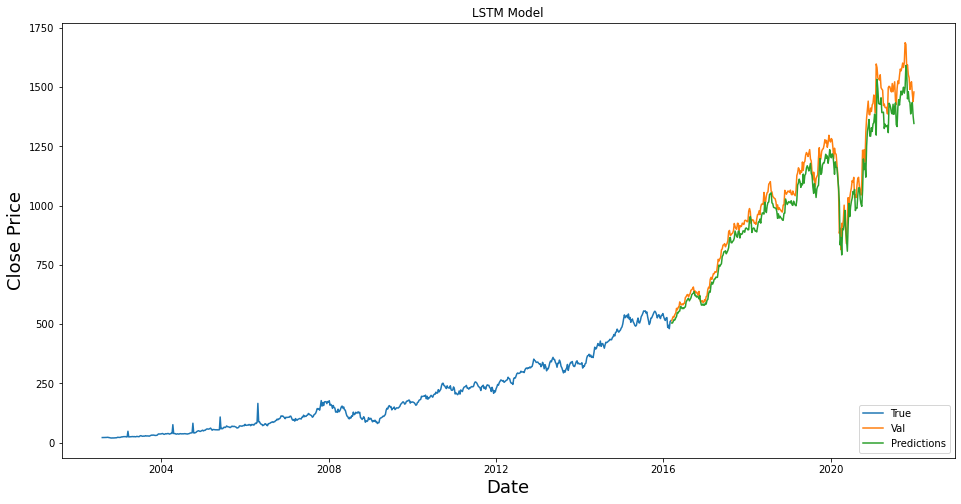

In [86]:
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [87]:
model.save('l_model.h5')

#### Prophet:

In [88]:
hdfc = hdfc.reset_index()

In [89]:
df = hdfc.filter(['Date', 'Close'])
df

Date        Close
0    2002-08-04    21.000000
1    2002-08-11    21.030001
2    2002-08-18    20.950001
3    2002-08-25    20.955000
4    2002-09-01    21.065001
...         ...          ...
1008 2021-11-28  1513.550049
1009 2021-12-05  1522.550049
1010 2021-12-12  1473.050049
1011 2021-12-19  1438.900024
1012 2021-12-26  1479.400024

[1013 rows x 2 columns]

In [90]:
df.index[df['Close']<0]

Int64Index([], dtype='int64')

In [91]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

In [92]:
from prophet import Prophet

In [93]:
model1 = Prophet()

In [94]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [95]:
df_prpht = df.rename(columns={'Date':'ds','Close_shift':'y'})

In [96]:
df_prpht.head()

ds      Close         y
0 2002-08-04  21.000000       NaN
1 2002-08-11  21.030001  0.030001
2 2002-08-18  20.950001 -0.080000
3 2002-08-25  20.955000  0.004999
4 2002-09-01  21.065001  0.110001

In [97]:
train_len1 = int(0.7*len(df))
train_len1

709

In [98]:
df_train = df_prpht[:train_len1]
df_test = df_prpht[train_len1:]
df_train, df_train.shape

(            ds       Close          y
 0   2002-08-04   21.000000        NaN
 1   2002-08-11   21.030001   0.030001
 2   2002-08-18   20.950001  -0.080000
 3   2002-08-25   20.955000   0.004999
 4   2002-09-01   21.065001   0.110001
 ..         ...         ...        ...
 704 2016-01-31  527.625000   2.700012
 705 2016-02-07  485.700012 -41.924988
 706 2016-02-14  494.649994   8.949982
 707 2016-02-21  480.500000 -14.149994
 708 2016-02-28  510.274994  29.774994
 
 [709 rows x 3 columns],
 (709, 3))

In [99]:
model1.fit(df_train)

07:00:28 - cmdstanpy - INFO - Chain [1] start processing
07:00:28 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
periods = len(df)-len(df_train)
periods

304

In [101]:
future_dates = model1.make_future_dataframe(periods=periods)

In [102]:
future_dates.shape

(1013, 1)

In [103]:
future_dates.head()

ds
0 2002-08-04
1 2002-08-11
2 2002-08-18
3 2002-08-25
4 2002-09-01

In [104]:
prediction = model1.predict(future_dates)

In [105]:
prediction.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2002-08-04 -0.037341  -13.127059   11.170495    -0.037341    -0.037341   
1 2002-08-11 -0.035303  -13.653554   11.067930    -0.035303    -0.035303   
2 2002-08-18 -0.033266  -14.174706   10.933805    -0.033266    -0.033266   
3 2002-08-25 -0.031228  -13.851269   11.414403    -0.031228    -0.031228   
4 2002-09-01 -0.029191  -10.352348   13.445075    -0.029191    -0.029191   

   additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0       -1.087772             -1.087772             -1.087772 -1.087772   
1       -1.406852             -1.406852             -1.406852 -1.406852   
2       -1.779479             -1.779479             -1.779479 -1.779479   
3       -0.814878             -0.814878             -0.814878 -0.814878   
4        1.402278              1.402278              1.402278  1.402278   

   yearly_lower  yearly_upper  multiplicative_terms  \
0     -1.087772     -1.087772                   0.0   
1     -1.406852     -1.406852                   0.0   
2     -1.779479     -1.779479                   0.0   
3     -0.814878     -0.814878                   0.0   
4      1.402278      1.402278                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0 -1.125113  
1                         0.0                         0.0 -1.442156  
2                         0.0                         0.0 -1.812744  
3                         0.0                         0.0 -0.846107  
4                         0.0                         0.0  1.373087

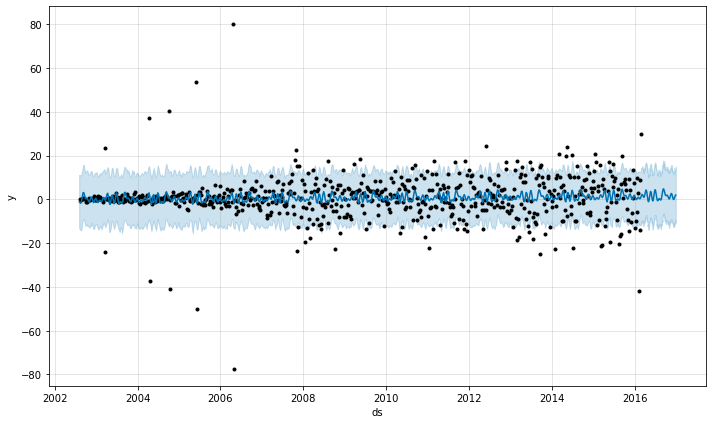

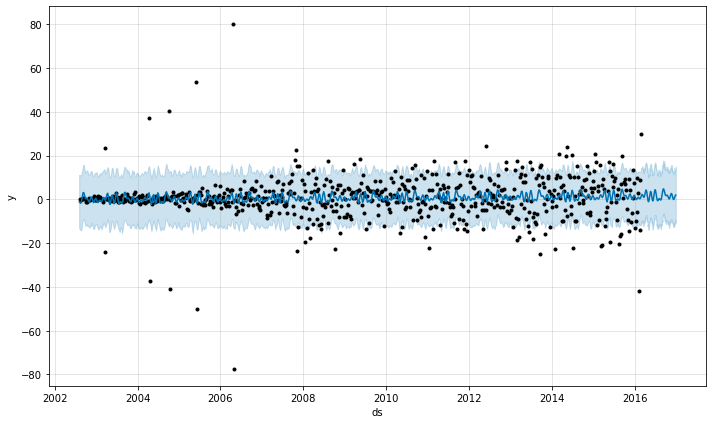

In [106]:
model1.plot(prediction)

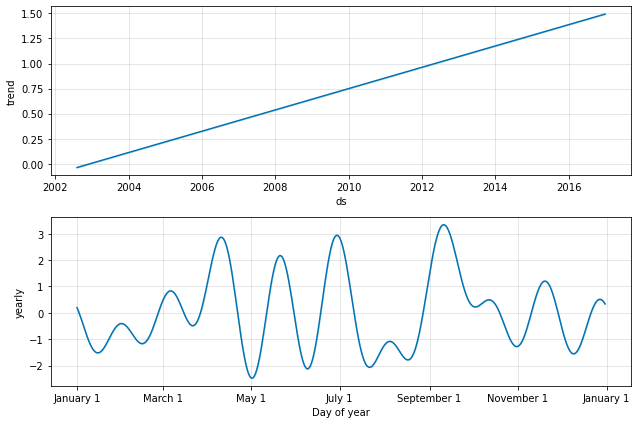

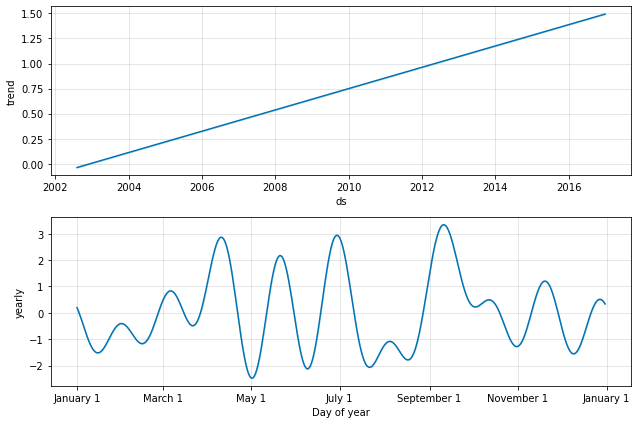

In [107]:
model1.plot_components(prediction)

In [108]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [109]:
df_train.shape, len(df)-len(df_train)

((709, 3), 304)

In [110]:
cv = cross_validation(model1, initial='709 days', period='3 days', horizon='304 days')

  0%|          | 0/1313 [00:00<?, ?it/s]

07:00:47 - cmdstanpy - INFO - Chain [1] start processing
07:00:47 - cmdstanpy - INFO - Chain [1] done processing
07:00:48 - cmdstanpy - INFO - Chain [1] start processing
07:00:48 - cmdstanpy - INFO - Chain [1] done processing
07:00:49 - cmdstanpy - INFO - Chain [1] start processing
07:00:49 - cmdstanpy - INFO - Chain [1] done processing
07:00:51 - cmdstanpy - INFO - Chain [1] start processing
07:00:51 - cmdstanpy - INFO - Chain [1] done processing
07:00:53 - cmdstanpy - INFO - Chain [1] start processing
07:00:53 - cmdstanpy - INFO - Chain [1] done processing
07:00:53 - cmdstanpy - INFO - Chain [1] start processing
07:00:53 - cmdstanpy - INFO - Chain [1] done processing
07:00:55 - cmdstanpy - INFO - Chain [1] start processing
07:00:55 - cmdstanpy - INFO - Chain [1] done processing
07:00:56 - cmdstanpy - INFO - Chain [1] start processing
07:00:56 - cmdstanpy - INFO - Chain [1] done processing
07:00:58 - cmdstanpy - INFO - Chain [1] start processing
07:00:58 - cmdstanpy - INFO - Chain [1]

07:02:37 - cmdstanpy - INFO - Chain [1] done processing
07:02:38 - cmdstanpy - INFO - Chain [1] start processing
07:02:39 - cmdstanpy - INFO - Chain [1] done processing
07:02:40 - cmdstanpy - INFO - Chain [1] start processing
07:02:41 - cmdstanpy - INFO - Chain [1] done processing
07:02:42 - cmdstanpy - INFO - Chain [1] start processing
07:02:42 - cmdstanpy - INFO - Chain [1] done processing
07:02:43 - cmdstanpy - INFO - Chain [1] start processing
07:02:43 - cmdstanpy - INFO - Chain [1] done processing
07:02:45 - cmdstanpy - INFO - Chain [1] start processing
07:02:45 - cmdstanpy - INFO - Chain [1] done processing
07:02:46 - cmdstanpy - INFO - Chain [1] start processing
07:02:46 - cmdstanpy - INFO - Chain [1] done processing
07:02:48 - cmdstanpy - INFO - Chain [1] start processing
07:02:48 - cmdstanpy - INFO - Chain [1] done processing
07:02:49 - cmdstanpy - INFO - Chain [1] start processing
07:02:49 - cmdstanpy - INFO - Chain [1] done processing
07:02:50 - cmdstanpy - INFO - Chain [1] 

07:04:20 - cmdstanpy - INFO - Chain [1] done processing
07:04:22 - cmdstanpy - INFO - Chain [1] start processing
07:04:22 - cmdstanpy - INFO - Chain [1] done processing
07:04:23 - cmdstanpy - INFO - Chain [1] start processing
07:04:23 - cmdstanpy - INFO - Chain [1] done processing
07:04:24 - cmdstanpy - INFO - Chain [1] start processing
07:04:24 - cmdstanpy - INFO - Chain [1] done processing
07:04:26 - cmdstanpy - INFO - Chain [1] start processing
07:04:26 - cmdstanpy - INFO - Chain [1] done processing
07:04:28 - cmdstanpy - INFO - Chain [1] start processing
07:04:28 - cmdstanpy - INFO - Chain [1] done processing
07:04:29 - cmdstanpy - INFO - Chain [1] start processing
07:04:29 - cmdstanpy - INFO - Chain [1] done processing
07:04:30 - cmdstanpy - INFO - Chain [1] start processing
07:04:30 - cmdstanpy - INFO - Chain [1] done processing
07:04:32 - cmdstanpy - INFO - Chain [1] start processing
07:04:32 - cmdstanpy - INFO - Chain [1] done processing
07:04:34 - cmdstanpy - INFO - Chain [1] 

07:06:05 - cmdstanpy - INFO - Chain [1] done processing
07:06:06 - cmdstanpy - INFO - Chain [1] start processing
07:06:07 - cmdstanpy - INFO - Chain [1] done processing
07:06:08 - cmdstanpy - INFO - Chain [1] start processing
07:06:08 - cmdstanpy - INFO - Chain [1] done processing
07:06:09 - cmdstanpy - INFO - Chain [1] start processing
07:06:09 - cmdstanpy - INFO - Chain [1] done processing
07:06:10 - cmdstanpy - INFO - Chain [1] start processing
07:06:11 - cmdstanpy - INFO - Chain [1] done processing
07:06:11 - cmdstanpy - INFO - Chain [1] start processing
07:06:11 - cmdstanpy - INFO - Chain [1] done processing
07:06:13 - cmdstanpy - INFO - Chain [1] start processing
07:06:13 - cmdstanpy - INFO - Chain [1] done processing
07:06:15 - cmdstanpy - INFO - Chain [1] start processing
07:06:15 - cmdstanpy - INFO - Chain [1] done processing
07:06:16 - cmdstanpy - INFO - Chain [1] start processing
07:06:16 - cmdstanpy - INFO - Chain [1] done processing
07:06:18 - cmdstanpy - INFO - Chain [1] 

07:07:52 - cmdstanpy - INFO - Chain [1] done processing
07:07:53 - cmdstanpy - INFO - Chain [1] start processing
07:07:54 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:57 - cmdstanpy - INFO - Chain [1] start processing
07:07:57 - cmdstanpy - INFO - Chain [1] done processing
07:07:58 - cmdstanpy - INFO - Chain [1] start processing
07:07:58 - cmdstanpy - INFO - Chain [1] done processing
07:08:00 - cmdstanpy - INFO - Chain [1] start processing
07:08:00 - cmdstanpy - INFO - Chain [1] done processing
07:08:01 - cmdstanpy - INFO - Chain [1] start processing
07:08:01 - cmdstanpy - INFO - Chain [1] done processing
07:08:02 - cmdstanpy - INFO - Chain [1] start processing
07:08:02 - cmdstanpy - INFO - Chain [1] done processing
07:08:03 - cmdstanpy - INFO - Chain [1] start processing
07:08:04 - cmdstanpy - INFO - Chain [1] done processing
07:08:05 - cmdstanpy - INFO - Chain [1] 

07:09:41 - cmdstanpy - INFO - Chain [1] done processing
07:09:42 - cmdstanpy - INFO - Chain [1] start processing
07:09:42 - cmdstanpy - INFO - Chain [1] done processing
07:09:44 - cmdstanpy - INFO - Chain [1] start processing
07:09:44 - cmdstanpy - INFO - Chain [1] done processing
07:09:45 - cmdstanpy - INFO - Chain [1] start processing
07:09:45 - cmdstanpy - INFO - Chain [1] done processing
07:09:47 - cmdstanpy - INFO - Chain [1] start processing
07:09:47 - cmdstanpy - INFO - Chain [1] done processing
07:09:48 - cmdstanpy - INFO - Chain [1] start processing
07:09:48 - cmdstanpy - INFO - Chain [1] done processing
07:09:50 - cmdstanpy - INFO - Chain [1] start processing
07:09:50 - cmdstanpy - INFO - Chain [1] done processing
07:09:51 - cmdstanpy - INFO - Chain [1] start processing
07:09:51 - cmdstanpy - INFO - Chain [1] done processing
07:09:53 - cmdstanpy - INFO - Chain [1] start processing
07:09:53 - cmdstanpy - INFO - Chain [1] done processing
07:09:55 - cmdstanpy - INFO - Chain [1] 

07:11:29 - cmdstanpy - INFO - Chain [1] done processing
07:11:31 - cmdstanpy - INFO - Chain [1] start processing
07:11:31 - cmdstanpy - INFO - Chain [1] done processing
07:11:32 - cmdstanpy - INFO - Chain [1] start processing
07:11:32 - cmdstanpy - INFO - Chain [1] done processing
07:11:34 - cmdstanpy - INFO - Chain [1] start processing
07:11:35 - cmdstanpy - INFO - Chain [1] done processing
07:11:36 - cmdstanpy - INFO - Chain [1] start processing
07:11:36 - cmdstanpy - INFO - Chain [1] done processing
07:11:37 - cmdstanpy - INFO - Chain [1] start processing
07:11:37 - cmdstanpy - INFO - Chain [1] done processing
07:11:39 - cmdstanpy - INFO - Chain [1] start processing
07:11:39 - cmdstanpy - INFO - Chain [1] done processing
07:11:40 - cmdstanpy - INFO - Chain [1] start processing
07:11:40 - cmdstanpy - INFO - Chain [1] done processing
07:11:41 - cmdstanpy - INFO - Chain [1] start processing
07:11:41 - cmdstanpy - INFO - Chain [1] done processing
07:11:43 - cmdstanpy - INFO - Chain [1] 

07:13:20 - cmdstanpy - INFO - Chain [1] done processing
07:13:21 - cmdstanpy - INFO - Chain [1] start processing
07:13:21 - cmdstanpy - INFO - Chain [1] done processing
07:13:23 - cmdstanpy - INFO - Chain [1] start processing
07:13:23 - cmdstanpy - INFO - Chain [1] done processing
07:13:25 - cmdstanpy - INFO - Chain [1] start processing
07:13:25 - cmdstanpy - INFO - Chain [1] done processing
07:13:26 - cmdstanpy - INFO - Chain [1] start processing
07:13:26 - cmdstanpy - INFO - Chain [1] done processing
07:13:28 - cmdstanpy - INFO - Chain [1] start processing
07:13:28 - cmdstanpy - INFO - Chain [1] done processing
07:13:29 - cmdstanpy - INFO - Chain [1] start processing
07:13:29 - cmdstanpy - INFO - Chain [1] done processing
07:13:31 - cmdstanpy - INFO - Chain [1] start processing
07:13:31 - cmdstanpy - INFO - Chain [1] done processing
07:13:33 - cmdstanpy - INFO - Chain [1] start processing
07:13:33 - cmdstanpy - INFO - Chain [1] done processing
07:13:34 - cmdstanpy - INFO - Chain [1] 

07:15:25 - cmdstanpy - INFO - Chain [1] done processing
07:15:26 - cmdstanpy - INFO - Chain [1] start processing
07:15:27 - cmdstanpy - INFO - Chain [1] done processing
07:15:29 - cmdstanpy - INFO - Chain [1] start processing
07:15:29 - cmdstanpy - INFO - Chain [1] done processing
07:15:30 - cmdstanpy - INFO - Chain [1] start processing
07:15:30 - cmdstanpy - INFO - Chain [1] done processing
07:15:32 - cmdstanpy - INFO - Chain [1] start processing
07:15:32 - cmdstanpy - INFO - Chain [1] done processing
07:15:33 - cmdstanpy - INFO - Chain [1] start processing
07:15:33 - cmdstanpy - INFO - Chain [1] done processing
07:15:35 - cmdstanpy - INFO - Chain [1] start processing
07:15:35 - cmdstanpy - INFO - Chain [1] done processing
07:15:37 - cmdstanpy - INFO - Chain [1] start processing
07:15:37 - cmdstanpy - INFO - Chain [1] done processing
07:15:39 - cmdstanpy - INFO - Chain [1] start processing
07:15:39 - cmdstanpy - INFO - Chain [1] done processing
07:15:41 - cmdstanpy - INFO - Chain [1] 

07:17:35 - cmdstanpy - INFO - Chain [1] done processing
07:17:38 - cmdstanpy - INFO - Chain [1] start processing
07:17:38 - cmdstanpy - INFO - Chain [1] done processing
07:17:40 - cmdstanpy - INFO - Chain [1] start processing
07:17:40 - cmdstanpy - INFO - Chain [1] done processing
07:17:41 - cmdstanpy - INFO - Chain [1] start processing
07:17:42 - cmdstanpy - INFO - Chain [1] done processing
07:17:43 - cmdstanpy - INFO - Chain [1] start processing
07:17:43 - cmdstanpy - INFO - Chain [1] done processing
07:17:45 - cmdstanpy - INFO - Chain [1] start processing
07:17:45 - cmdstanpy - INFO - Chain [1] done processing
07:17:47 - cmdstanpy - INFO - Chain [1] start processing
07:17:47 - cmdstanpy - INFO - Chain [1] done processing
07:17:49 - cmdstanpy - INFO - Chain [1] start processing
07:17:49 - cmdstanpy - INFO - Chain [1] done processing
07:17:51 - cmdstanpy - INFO - Chain [1] start processing
07:17:51 - cmdstanpy - INFO - Chain [1] done processing
07:17:52 - cmdstanpy - INFO - Chain [1] 

07:19:48 - cmdstanpy - INFO - Chain [1] done processing
07:19:50 - cmdstanpy - INFO - Chain [1] start processing
07:19:50 - cmdstanpy - INFO - Chain [1] done processing
07:19:53 - cmdstanpy - INFO - Chain [1] start processing
07:19:53 - cmdstanpy - INFO - Chain [1] done processing
07:19:55 - cmdstanpy - INFO - Chain [1] start processing
07:19:55 - cmdstanpy - INFO - Chain [1] done processing
07:19:56 - cmdstanpy - INFO - Chain [1] start processing
07:19:56 - cmdstanpy - INFO - Chain [1] done processing
07:19:58 - cmdstanpy - INFO - Chain [1] start processing
07:19:58 - cmdstanpy - INFO - Chain [1] done processing
07:20:00 - cmdstanpy - INFO - Chain [1] start processing
07:20:00 - cmdstanpy - INFO - Chain [1] done processing
07:20:03 - cmdstanpy - INFO - Chain [1] start processing
07:20:03 - cmdstanpy - INFO - Chain [1] done processing
07:20:04 - cmdstanpy - INFO - Chain [1] start processing
07:20:05 - cmdstanpy - INFO - Chain [1] done processing
07:20:06 - cmdstanpy - INFO - Chain [1] 

07:21:57 - cmdstanpy - INFO - Chain [1] done processing
07:21:59 - cmdstanpy - INFO - Chain [1] start processing
07:21:59 - cmdstanpy - INFO - Chain [1] done processing
07:22:01 - cmdstanpy - INFO - Chain [1] start processing
07:22:01 - cmdstanpy - INFO - Chain [1] done processing
07:22:02 - cmdstanpy - INFO - Chain [1] start processing
07:22:03 - cmdstanpy - INFO - Chain [1] done processing
07:22:04 - cmdstanpy - INFO - Chain [1] start processing
07:22:04 - cmdstanpy - INFO - Chain [1] done processing
07:22:06 - cmdstanpy - INFO - Chain [1] start processing
07:22:06 - cmdstanpy - INFO - Chain [1] done processing
07:22:08 - cmdstanpy - INFO - Chain [1] start processing
07:22:08 - cmdstanpy - INFO - Chain [1] done processing
07:22:09 - cmdstanpy - INFO - Chain [1] start processing
07:22:09 - cmdstanpy - INFO - Chain [1] done processing
07:22:11 - cmdstanpy - INFO - Chain [1] start processing
07:22:11 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] 

07:24:01 - cmdstanpy - INFO - Chain [1] done processing
07:24:04 - cmdstanpy - INFO - Chain [1] start processing
07:24:04 - cmdstanpy - INFO - Chain [1] done processing
07:24:06 - cmdstanpy - INFO - Chain [1] start processing
07:24:06 - cmdstanpy - INFO - Chain [1] done processing
07:24:08 - cmdstanpy - INFO - Chain [1] start processing
07:24:08 - cmdstanpy - INFO - Chain [1] done processing
07:24:09 - cmdstanpy - INFO - Chain [1] start processing
07:24:09 - cmdstanpy - INFO - Chain [1] done processing
07:24:11 - cmdstanpy - INFO - Chain [1] start processing
07:24:11 - cmdstanpy - INFO - Chain [1] done processing
07:24:13 - cmdstanpy - INFO - Chain [1] start processing
07:24:14 - cmdstanpy - INFO - Chain [1] done processing
07:24:15 - cmdstanpy - INFO - Chain [1] start processing
07:24:15 - cmdstanpy - INFO - Chain [1] done processing
07:24:17 - cmdstanpy - INFO - Chain [1] start processing
07:24:17 - cmdstanpy - INFO - Chain [1] done processing
07:24:19 - cmdstanpy - INFO - Chain [1] 

07:26:12 - cmdstanpy - INFO - Chain [1] done processing
07:26:14 - cmdstanpy - INFO - Chain [1] start processing
07:26:14 - cmdstanpy - INFO - Chain [1] done processing
07:26:16 - cmdstanpy - INFO - Chain [1] start processing
07:26:16 - cmdstanpy - INFO - Chain [1] done processing
07:26:17 - cmdstanpy - INFO - Chain [1] start processing
07:26:17 - cmdstanpy - INFO - Chain [1] done processing
07:26:19 - cmdstanpy - INFO - Chain [1] start processing
07:26:19 - cmdstanpy - INFO - Chain [1] done processing
07:26:21 - cmdstanpy - INFO - Chain [1] start processing
07:26:21 - cmdstanpy - INFO - Chain [1] done processing
07:26:23 - cmdstanpy - INFO - Chain [1] start processing
07:26:23 - cmdstanpy - INFO - Chain [1] done processing
07:26:24 - cmdstanpy - INFO - Chain [1] start processing
07:26:24 - cmdstanpy - INFO - Chain [1] done processing
07:26:26 - cmdstanpy - INFO - Chain [1] start processing
07:26:26 - cmdstanpy - INFO - Chain [1] done processing
07:26:27 - cmdstanpy - INFO - Chain [1] 

07:28:20 - cmdstanpy - INFO - Chain [1] done processing
07:28:22 - cmdstanpy - INFO - Chain [1] start processing
07:28:22 - cmdstanpy - INFO - Chain [1] done processing
07:28:23 - cmdstanpy - INFO - Chain [1] start processing
07:28:23 - cmdstanpy - INFO - Chain [1] done processing
07:28:25 - cmdstanpy - INFO - Chain [1] start processing
07:28:25 - cmdstanpy - INFO - Chain [1] done processing
07:28:26 - cmdstanpy - INFO - Chain [1] start processing
07:28:26 - cmdstanpy - INFO - Chain [1] done processing
07:28:28 - cmdstanpy - INFO - Chain [1] start processing
07:28:28 - cmdstanpy - INFO - Chain [1] done processing
07:28:30 - cmdstanpy - INFO - Chain [1] start processing
07:28:30 - cmdstanpy - INFO - Chain [1] done processing
07:28:32 - cmdstanpy - INFO - Chain [1] start processing
07:28:32 - cmdstanpy - INFO - Chain [1] done processing
07:28:33 - cmdstanpy - INFO - Chain [1] start processing
07:28:33 - cmdstanpy - INFO - Chain [1] done processing
07:28:35 - cmdstanpy - INFO - Chain [1] 

07:30:33 - cmdstanpy - INFO - Chain [1] done processing
07:30:35 - cmdstanpy - INFO - Chain [1] start processing
07:30:35 - cmdstanpy - INFO - Chain [1] done processing
07:30:38 - cmdstanpy - INFO - Chain [1] start processing
07:30:38 - cmdstanpy - INFO - Chain [1] done processing
07:30:40 - cmdstanpy - INFO - Chain [1] start processing
07:30:40 - cmdstanpy - INFO - Chain [1] done processing
07:30:41 - cmdstanpy - INFO - Chain [1] start processing
07:30:41 - cmdstanpy - INFO - Chain [1] done processing
07:30:43 - cmdstanpy - INFO - Chain [1] start processing
07:30:43 - cmdstanpy - INFO - Chain [1] done processing
07:30:45 - cmdstanpy - INFO - Chain [1] start processing
07:30:45 - cmdstanpy - INFO - Chain [1] done processing
07:30:47 - cmdstanpy - INFO - Chain [1] start processing
07:30:47 - cmdstanpy - INFO - Chain [1] done processing
07:30:49 - cmdstanpy - INFO - Chain [1] start processing
07:30:49 - cmdstanpy - INFO - Chain [1] done processing
07:30:51 - cmdstanpy - INFO - Chain [1] 

07:32:44 - cmdstanpy - INFO - Chain [1] done processing
07:32:46 - cmdstanpy - INFO - Chain [1] start processing
07:32:46 - cmdstanpy - INFO - Chain [1] done processing
07:32:47 - cmdstanpy - INFO - Chain [1] start processing
07:32:47 - cmdstanpy - INFO - Chain [1] done processing
07:32:49 - cmdstanpy - INFO - Chain [1] start processing
07:32:49 - cmdstanpy - INFO - Chain [1] done processing
07:32:51 - cmdstanpy - INFO - Chain [1] start processing
07:32:51 - cmdstanpy - INFO - Chain [1] done processing
07:32:52 - cmdstanpy - INFO - Chain [1] start processing
07:32:52 - cmdstanpy - INFO - Chain [1] done processing
07:32:53 - cmdstanpy - INFO - Chain [1] start processing
07:32:53 - cmdstanpy - INFO - Chain [1] done processing
07:32:54 - cmdstanpy - INFO - Chain [1] start processing
07:32:54 - cmdstanpy - INFO - Chain [1] done processing
07:32:56 - cmdstanpy - INFO - Chain [1] start processing
07:32:57 - cmdstanpy - INFO - Chain [1] done processing
07:32:58 - cmdstanpy - INFO - Chain [1] 

07:35:01 - cmdstanpy - INFO - Chain [1] done processing
07:35:02 - cmdstanpy - INFO - Chain [1] start processing
07:35:02 - cmdstanpy - INFO - Chain [1] done processing
07:35:04 - cmdstanpy - INFO - Chain [1] start processing
07:35:04 - cmdstanpy - INFO - Chain [1] done processing
07:35:06 - cmdstanpy - INFO - Chain [1] start processing
07:35:06 - cmdstanpy - INFO - Chain [1] done processing
07:35:08 - cmdstanpy - INFO - Chain [1] start processing
07:35:08 - cmdstanpy - INFO - Chain [1] done processing
07:35:09 - cmdstanpy - INFO - Chain [1] start processing
07:35:09 - cmdstanpy - INFO - Chain [1] done processing
07:35:11 - cmdstanpy - INFO - Chain [1] start processing
07:35:11 - cmdstanpy - INFO - Chain [1] done processing
07:35:13 - cmdstanpy - INFO - Chain [1] start processing
07:35:13 - cmdstanpy - INFO - Chain [1] done processing
07:35:15 - cmdstanpy - INFO - Chain [1] start processing
07:35:15 - cmdstanpy - INFO - Chain [1] done processing
07:35:17 - cmdstanpy - INFO - Chain [1] 

In [111]:
cv.head()

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2004-07-25  0.001481   -8.205168    8.331471  0.560001 2004-07-20
1 2004-08-01  0.702543   -7.011153    8.569682 -0.760002 2004-07-20
2 2004-08-08  0.616850   -7.092131    8.736985 -0.259998 2004-07-20
3 2004-08-15  0.078052   -8.075889    8.182478 -0.810001 2004-07-20
4 2004-08-22 -0.150136   -7.917016    7.449605  1.260002 2004-07-20

In [112]:
cv.shape

(57022, 6)

In [113]:
df_train_pm = performance_metrics(cv)

In [114]:
df_train_pm

horizon         mse       rmse       mae      mape     mdape     smape  \
0    31 days  101.762147  10.087723  6.483876  1.560185  1.018313  1.554715   
1    32 days  101.047879  10.052257  6.476211  1.562174  1.017057  1.554452   
2    33 days  101.539968  10.076704  6.485098  1.551613  1.016079  1.554584   
3    34 days  101.365849  10.068061  6.482641  1.549869  1.017045  1.554872   
4    35 days  100.651581  10.032526  6.474976  1.551858  1.017068  1.554609   
..       ...         ...        ...       ...       ...       ...       ...   
269 300 days  103.336818  10.165472  6.816210  1.474800  1.001628  1.547771   
270 301 days  103.731489  10.184866  6.826756  1.474726  1.002063  1.549735   
271 302 days  103.303783  10.163847  6.821347  1.480074  1.001628  1.549120   
272 303 days  103.803476  10.188399  6.830740  1.471951  1.000998  1.548788   
273 304 days  104.283945  10.211951  6.842742  1.471548  1.001075  1.550000   

     coverage  
0    0.851336  
1    0.851355  
2    0.850585  
3    0.850703  
4    0.850548  
..        ...  
269  0.836012  
270  0.836449  
271  0.836493  
272  0.835735  
273  0.835939  

[274 rows x 8 columns]

In [115]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(99.91188452182598, 9.99526014686551)

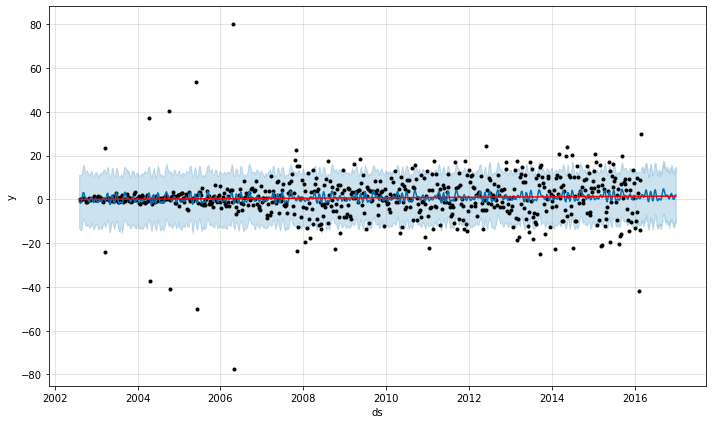

In [116]:
fig = model1.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model1, prediction)

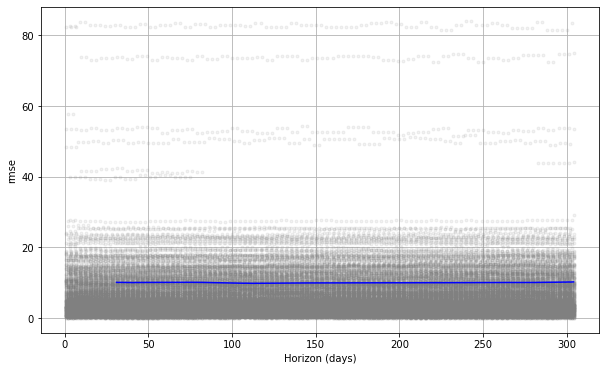

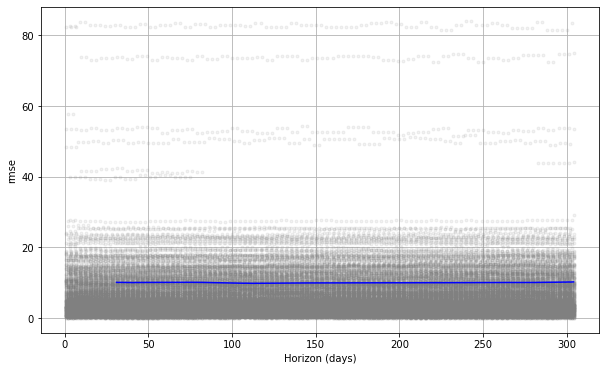

In [117]:
plot_cross_validation_metric(cv, metric='rmse')

07:37:05 - cmdstanpy - INFO - Chain [1] start processing
07:37:05 - cmdstanpy - INFO - Chain [1] done processing


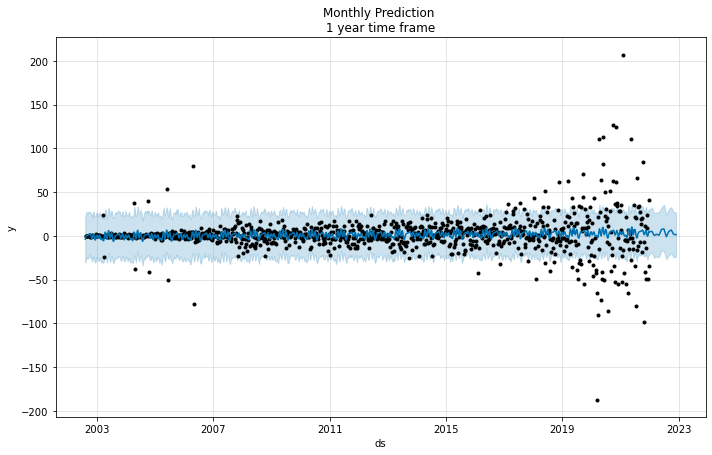

In [118]:
m = Prophet(changepoint_prior_scale=0.01).fit(df_prpht)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title('Monthly Prediction \n 1 year time frame ')
plt.show()

In [119]:
df_prpht

ds        Close          y
0    2002-08-04    21.000000        NaN
1    2002-08-11    21.030001   0.030001
2    2002-08-18    20.950001  -0.080000
3    2002-08-25    20.955000   0.004999
4    2002-09-01    21.065001   0.110001
...         ...          ...        ...
1008 2021-11-28  1513.550049  23.650024
1009 2021-12-05  1522.550049   9.000000
1010 2021-12-12  1473.050049 -49.500000
1011 2021-12-19  1438.900024 -34.150024
1012 2021-12-26  1479.400024  40.500000

[1013 rows x 3 columns]

In [120]:
m = Prophet(daily_seasonality=True)
m.fit(df_train)

07:37:11 - cmdstanpy - INFO - Chain [1] start processing
07:37:11 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
future = m.make_future_dataframe(periods=2*365)

In [122]:
forecast = m.predict(future)

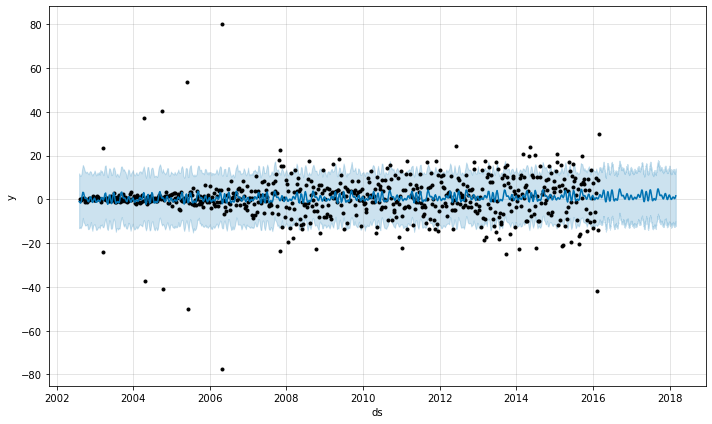

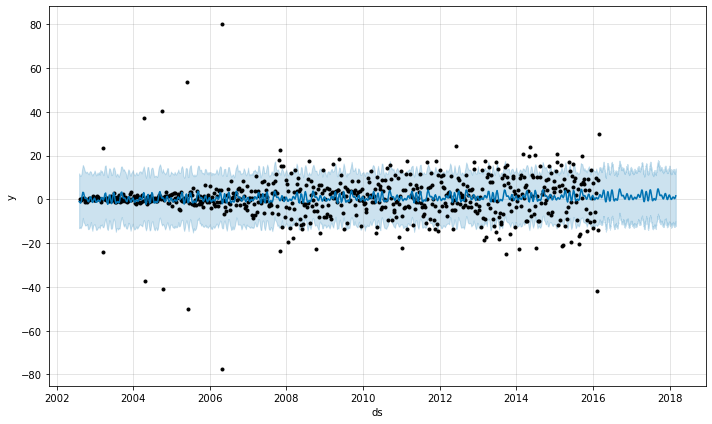

In [123]:
m.plot(forecast)

In [124]:
py.iplot([
    go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
])

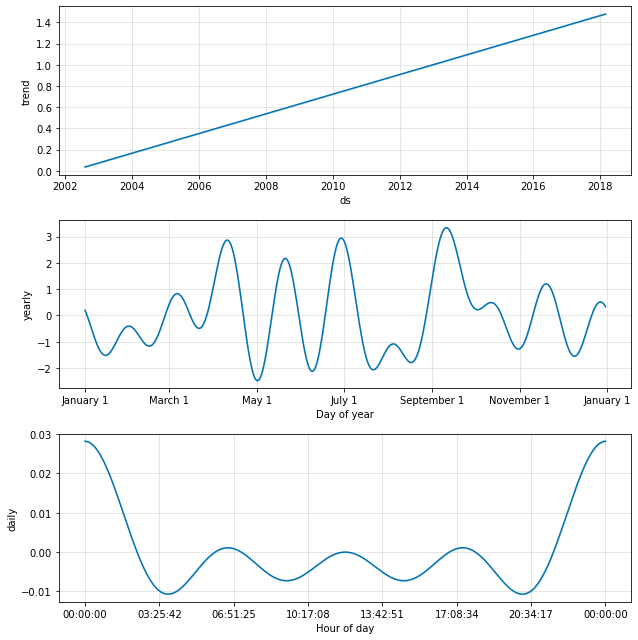

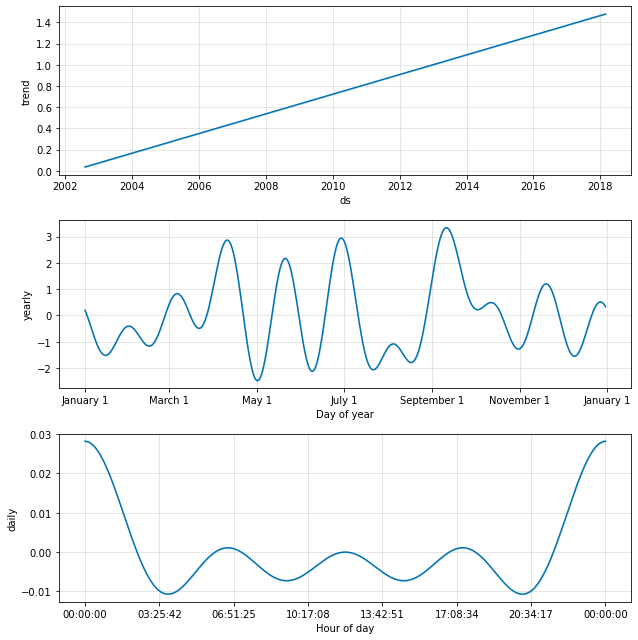

In [125]:
m.plot_components(forecast)

In [126]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
df_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/24 [00:00<?, ?it/s]

07:37:17 - cmdstanpy - INFO - Chain [1] start processing
07:37:17 - cmdstanpy - INFO - Chain [1] done processing
07:37:17 - cmdstanpy - INFO - Chain [1] start processing
07:37:18 - cmdstanpy - INFO - Chain [1] done processing
07:37:18 - cmdstanpy - INFO - Chain [1] start processing
07:37:18 - cmdstanpy - INFO - Chain [1] done processing
07:37:19 - cmdstanpy - INFO - Chain [1] start processing
07:37:19 - cmdstanpy - INFO - Chain [1] done processing
07:37:20 - cmdstanpy - INFO - Chain [1] start processing
07:37:20 - cmdstanpy - INFO - Chain [1] done processing
07:37:21 - cmdstanpy - INFO - Chain [1] start processing
07:37:21 - cmdstanpy - INFO - Chain [1] done processing
07:37:22 - cmdstanpy - INFO - Chain [1] start processing
07:37:22 - cmdstanpy - INFO - Chain [1] done processing
07:37:23 - cmdstanpy - INFO - Chain [1] start processing
07:37:23 - cmdstanpy - INFO - Chain [1] done processing
07:37:24 - cmdstanpy - INFO - Chain [1] start processing
07:37:24 - cmdstanpy - INFO - Chain [1]

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2003-11-02  0.123566   -5.235961    5.529286 -1.080000 2003-10-29
1 2003-11-09  0.697051   -4.394547    6.060311 -0.779999 2003-10-29
2 2003-11-16  1.194652   -4.453532    5.970664  0.549999 2003-10-29
3 2003-11-23  1.050755   -4.411627    6.470985 -0.035000 2003-10-29
4 2003-11-30  0.571043   -4.894666    5.818233  2.570002 2003-10-29

In [127]:
df_p = performance_metrics(df_cv)
df_p

horizon         mse       rmse       mae      mape     mdape     smape  \
0    37 days  160.972880  12.687509  6.593488  1.563940  1.027372  1.371410   
1    38 days  182.823303  13.521217  6.986008  1.558073  1.029637  1.386632   
2    39 days  182.262762  13.500473  7.034293  1.679830  1.029637  1.401562   
3    40 days  180.879087  13.449130  6.990034  1.721684  1.027372  1.409620   
4    41 days  182.835855  13.521681  7.106309  1.792537  1.033045  1.434907   
..       ...         ...        ...       ...       ...       ...       ...   
324 361 days  111.903941  10.578466  7.291869  1.361796  0.986248  1.548287   
325 362 days  109.002881  10.440445  7.134220  1.330819  0.979595  1.524905   
326 363 days  112.803159  10.620883  7.238987  1.331583  0.979595  1.511452   
327 364 days  112.771958  10.619414  7.209116  1.321265  0.971623  1.488546   
328 365 days  118.016856  10.863556  7.270792  1.317206  0.971227  1.457817   

     coverage  
0    0.880000  
1    0.880000  
2    0.877333  
3    0.880000  
4    0.872000  
..        ...  
324  0.800000  
325  0.808000  
326  0.800000  
327  0.800000  
328  0.792000  

[329 rows x 8 columns]

In [128]:
RMSE = sum(df_p['rmse'])/len(df_p)

In [129]:
RMSE

9.465980076053006

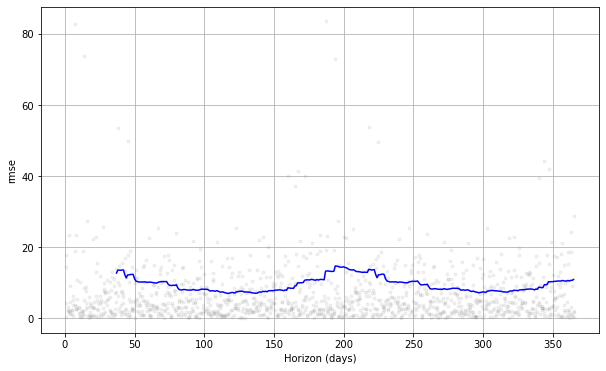

In [130]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [131]:
from prophet.serialize import model_to_json, model_from_json

In [132]:
with open('prophet_model.json', 'w') as fout:
    fout.write(model_to_json(model1))

In [133]:
with open('prophet_model.json', 'r') as fin:
    model1 = model_from_json(fin.read())

#### ARIMA Model

In [134]:
ar_df = hdfc
ar_df

Date         High          Low         Open        Close  \
0    2002-08-04    21.290001    20.809999    21.290001    21.000000   
1    2002-08-11    21.500000    20.735001    20.879999    21.030001   
2    2002-08-18    21.200001    20.700001    21.049999    20.950001   
3    2002-08-25    21.150000    20.799999    21.129999    20.955000   
4    2002-09-01    21.395000    20.900000    21.090000    21.065001   
...         ...          ...          ...          ...          ...   
1008 2021-11-28  1535.949951  1462.000000  1494.800049  1513.550049   
1009 2021-12-05  1555.050049  1497.349976  1513.000000  1522.550049   
1010 2021-12-12  1537.650024  1467.699951  1526.000000  1473.050049   
1011 2021-12-19  1458.000000  1414.099976  1452.000000  1438.900024   
1012 2021-12-26  1484.800049  1422.150024  1428.900024  1479.400024   

          Volume    Adj Close  
0      1956490.0    18.149456  
1      1742100.0    18.175390  
2      3236630.0    18.106249  
3      2605750.0    18.110565  
4      1288510.0    18.205637  
...          ...          ...  
1008  33108988.0  1496.154175  
1009  27139864.0  1505.050781  
1010  28916795.0  1456.119751  
1011  27096546.0  1422.362183  
1012  15683066.0  1462.396729  

[1013 rows x 7 columns]

In [135]:
from statsmodels.tsa.stattools import adfuller

In [136]:
test_result = adfuller(ar_df['Close'])

In [137]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
    else:
        print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is not stationary")


In [138]:
adfuller_test(ar_df['Close'])

ADF Test Statistics : 1.4413045598208305
p-value : 0.9972939365584129
#Lags Used : 22
Number of Observations Used : 990
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is not stationary


In [139]:
ar_df['Close_shift'] = ar_df['Close'] - ar_df['Close'].shift(1)

In [140]:
ar_df['Close_shift'] = ar_df['Close_shift'].fillna(method='bfill')
ar_df['Close_shift']

0        0.030001
1        0.030001
2       -0.080000
3        0.004999
4        0.110001
          ...    
1008    23.650024
1009     9.000000
1010   -49.500000
1011   -34.150024
1012    40.500000
Name: Close_shift, Length: 1013, dtype: float64

In [141]:
test_result = adfuller(ar_df['Close_shift'])

In [142]:
adfuller_test(ar_df['Close_shift'])

ADF Test Statistics : -7.4970616646552655
p-value : 4.351461851310534e-11
#Lags Used : 21
Number of Observations Used : 991
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


In [143]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [144]:
model2 = pm.auto_arima(df_train['Close'], start_p=1, start_q=1, test='adf',
                      max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0,
                      D=0, trace=True, error_action='ignore', suppress_warnings=True,
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5180.232, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5227.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5178.327, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5179.901, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5229.459, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5180.259, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5179.022, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5182.342, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.402 seconds


In [145]:
model2 = ARIMA(df_train['Close'], order=(1,1,0))
model2_fit = model2.fit()

In [146]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  709
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2589.171
Date:                Fri, 04 Nov 2022   AIC                           5182.342
Time:                        07:38:06   BIC                           5191.467
Sample:                             0   HQIC                          5185.868
                                - 709                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2604      0.015    -16.813      0.000      -0.291      -0.230
sigma2        87.8877      1.810     48.558      0.000      84.340      91.435
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              4514.62
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.72
Prob(H) (two-sided):                  0.11   Kurtosis:                        15.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
from pmdarima.arima import auto_arima

In [148]:
data = hdfc.sort_index(ascending=True, axis=0)

In [149]:
train = data[:709]
valid = data[709:]

In [150]:
training = train['Close']
validation = train['Close']

In [151]:
model_ar = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                     start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                     suppress_warnings=True)
model_ar.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5634.659, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5371.372, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5585.239, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5275.877, Time=0.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5331.376, Time=0.55 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5276.572, Time=1.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5275.952, Time=1.15 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5274.273, Time=0.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5368.699, Time=0.37 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=i

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [152]:
forecast = model_ar.predict(n_periods=304)
forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])

In [178]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

753.6205409993875

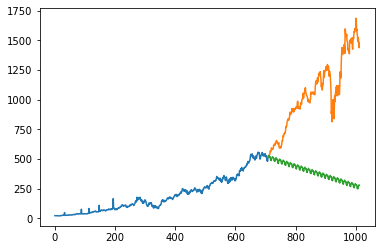

In [154]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])